In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('G:/ML Paper/Dataset/athlete_events.csv')
region_df = pd.read_csv('G:/ML Paper/Dataset/noc_regions.csv')

pd.set_option('display.max_rows', None)  # Shows all rows
pd.set_option('display.max_columns', None)  # Shows all columns

In [ ]:
df.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [ ]:
df.shape

(271116, 15)

In [ ]:
# Merge the dataframes on 'NOC'
df = df.merge(region_df, on='NOC', how='left')

In [ ]:
# Display unique regions
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'USA', 'Finland', 'Norway',
       'Romania', 'Estonia', 'France', 'Morocco', 'Spain', 'Egypt',
       'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan',
       'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon',
       'Turkey', 'Chile', 'Mexico', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Virgin Islands, US', 'Sri Lanka',
       'Armenia', 'Ivory

In [ ]:
# Check for missing values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

1385

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Verify that duplicates are removed
df.duplicated().sum()

0

In [ ]:
# Display the count of each medal type
df['Medal'].value_counts()

Medal
Gold      13369
Bronze    13295
Silver    13108
Name: count, dtype: int64

In [ ]:
# One-hot encode the 'Medal' column
df = pd.concat([df, pd.get_dummies(df['Medal'])], axis=1)

In [ ]:
# Display the first few rows of the dataframe
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  Bronze   Gold  \
0       Basketball Men's Basketball   NaN        China   NaN   False  False   
1      Judo Men's Extra-Lightweight   NaN        China   NaN   False  False   
2           Football Men's Football   NaN      Denmark   NaN   False  False   
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN   False   True   
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN   False  False   

   Silver  
0   False  
1   False  
2   False  
3   False  
4   False

In [ ]:
df.shape

(269731, 20)

In [ ]:
# Display unique sports and events
print(df['Sport'].unique())
print(df['Event'].unique())

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']
["Basketball Men's Basketball" "Judo Men's Extra-Lightweight"
 "Football Men's Football" "Tug-Of-War Men's Tug-Of-Wa

In [ ]:
#Create backup1
backup1 = df.copy()
backup1.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  Bronze   Gold  \
0       Basketball Men's Basketball   NaN        China   NaN   False  False   
1      Judo Men's Extra-Lightweight   NaN        China   NaN   False  False   
2           Football Men's Football   NaN      Denmark   NaN   False  False   
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN   False   True   
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN   False  False   

   Silver  
0   False  
1   False  
2   False  
3   False  
4   False

In [ ]:
backup1 = backup1.sort_values(by='Year', ascending=True)
backup1.head(50)

ID                            Name Sex   Age  Height  Weight  \
113465   57486             Pantelis Karasevdas   M   NaN     NaN     NaN   
236410  118532              Momcsill Tapavicza   M  23.0     NaN     NaN   
70118    35708               Marie Lon Flameng   M  18.0     NaN     NaN   
82893    42102               Miltiadis Gouskos   M   NaN     NaN     NaN   
82822    42069  Grantley Thomas Smart Goulding   M  22.0     NaN     NaN   
22953    12068            Arthur Charles Blake   M  24.0     NaN     NaN   
22952    12068            Arthur Charles Blake   M  24.0     NaN     NaN   
70195    35740                   Alfred Flatow   M  26.0     NaN     NaN   
182918   91932   Khios "Konstantinos" Paspatis   M  17.0     NaN     NaN   
182919   91932   Khios "Konstantinos" Paspatis   M  17.0     NaN     NaN   
70196    35740                   Alfred Flatow   M  26.0     NaN     NaN   
171110   85988            Holger Louis Nielsen   M  29.0     NaN     NaN   
171109   85988            Holger Louis Nielsen   M  29.0     NaN     NaN   
171108   85988            Holger Louis Nielsen   M  29.0     NaN     NaN   
171107   85988            Holger Louis Nielsen   M  29.0     NaN     NaN   
97180    49185                   Fritz Hofmann   M  24.0   167.0    56.0   
97181    49185                   Fritz Hofmann   M  24.0   167.0    56.0   
97182    49185                   Fritz Hofmann   M  24.0   167.0    56.0   
97183    49185                   Fritz Hofmann   M  24.0   167.0    56.0   
97184    49185                   Fritz Hofmann   M  24.0   167.0    56.0   
97185    49185                   Fritz Hofmann   M  24.0   167.0    56.0   
171106   85988            Holger Louis Nielsen   M  29.0     NaN     NaN   
171105   85988            Holger Louis Nielsen   M  29.0     NaN     NaN   
70197    35740                   Alfred Flatow   M  26.0     NaN     NaN   
236411  118532              Momcsill Tapavicza   M  23.0     NaN     NaN   
70117    35708               Marie Lon Flameng   M  18.0     NaN     NaN   
236412  118532              Momcsill Tapavicza   M  23.0     NaN     NaN   
70116    35708               Marie Lon Flameng   M  18.0     NaN     NaN   
84519    42914              Georgios Grigoriou   M   NaN     NaN     NaN   
23918    12563       Conrad Helmut Fritz Bcker   M  25.0     NaN     NaN   
23917    12563       Conrad Helmut Fritz Bcker   M  25.0     NaN     NaN   
23916    12563       Conrad Helmut Fritz Bcker   M  25.0     NaN     NaN   
23915    12563       Conrad Helmut Fritz Bcker   M  25.0     NaN     NaN   
23914    12563       Conrad Helmut Fritz Bcker   M  25.0     NaN     NaN   
23913    12563       Conrad Helmut Fritz Bcker   M  25.0     NaN     NaN   
23912    12563       Conrad Helmut Fritz Bcker   M  25.0     NaN     NaN   
70079    35698      Edwin Harold "Teddy" Flack   M  22.0     NaN     NaN   
70080    35698      Edwin Harold "Teddy" Flack   M  22.0     NaN     NaN   
70081    35698      Edwin Harold "Teddy" Flack   M  22.0     NaN     NaN   
70198    35740                   Alfred Flatow   M  26.0     NaN     NaN   
10332     5660               Georgios Aspiotis   M   NaN     NaN     NaN   
70083    35698      Edwin Harold "Teddy" Flack   M  22.0     NaN     NaN   
83614    42499          Eugne Henry Gravelotte   M  20.0     NaN     NaN   
70115    35708               Marie Lon Flameng   M  18.0     NaN     NaN   
96051    48633               Georg Otto Hilmar   M  19.0     NaN     NaN   
96052    48633               Georg Otto Hilmar   M  19.0     NaN     NaN   
157545   79098              Anastasios Metaxas   M  34.0     NaN     NaN   
157544   79098              Anastasios Metaxas   M  34.0     NaN     NaN   
96053    48633               Georg Otto Hilmar   M  19.0     NaN     NaN   
96054    48633               Georg Otto Hilmar   M  19.0     NaN     NaN   

                           Team  NOC        Games  Year  Season    City  \
113465                   Greece  GRE  1896 Summer  1896  Sum

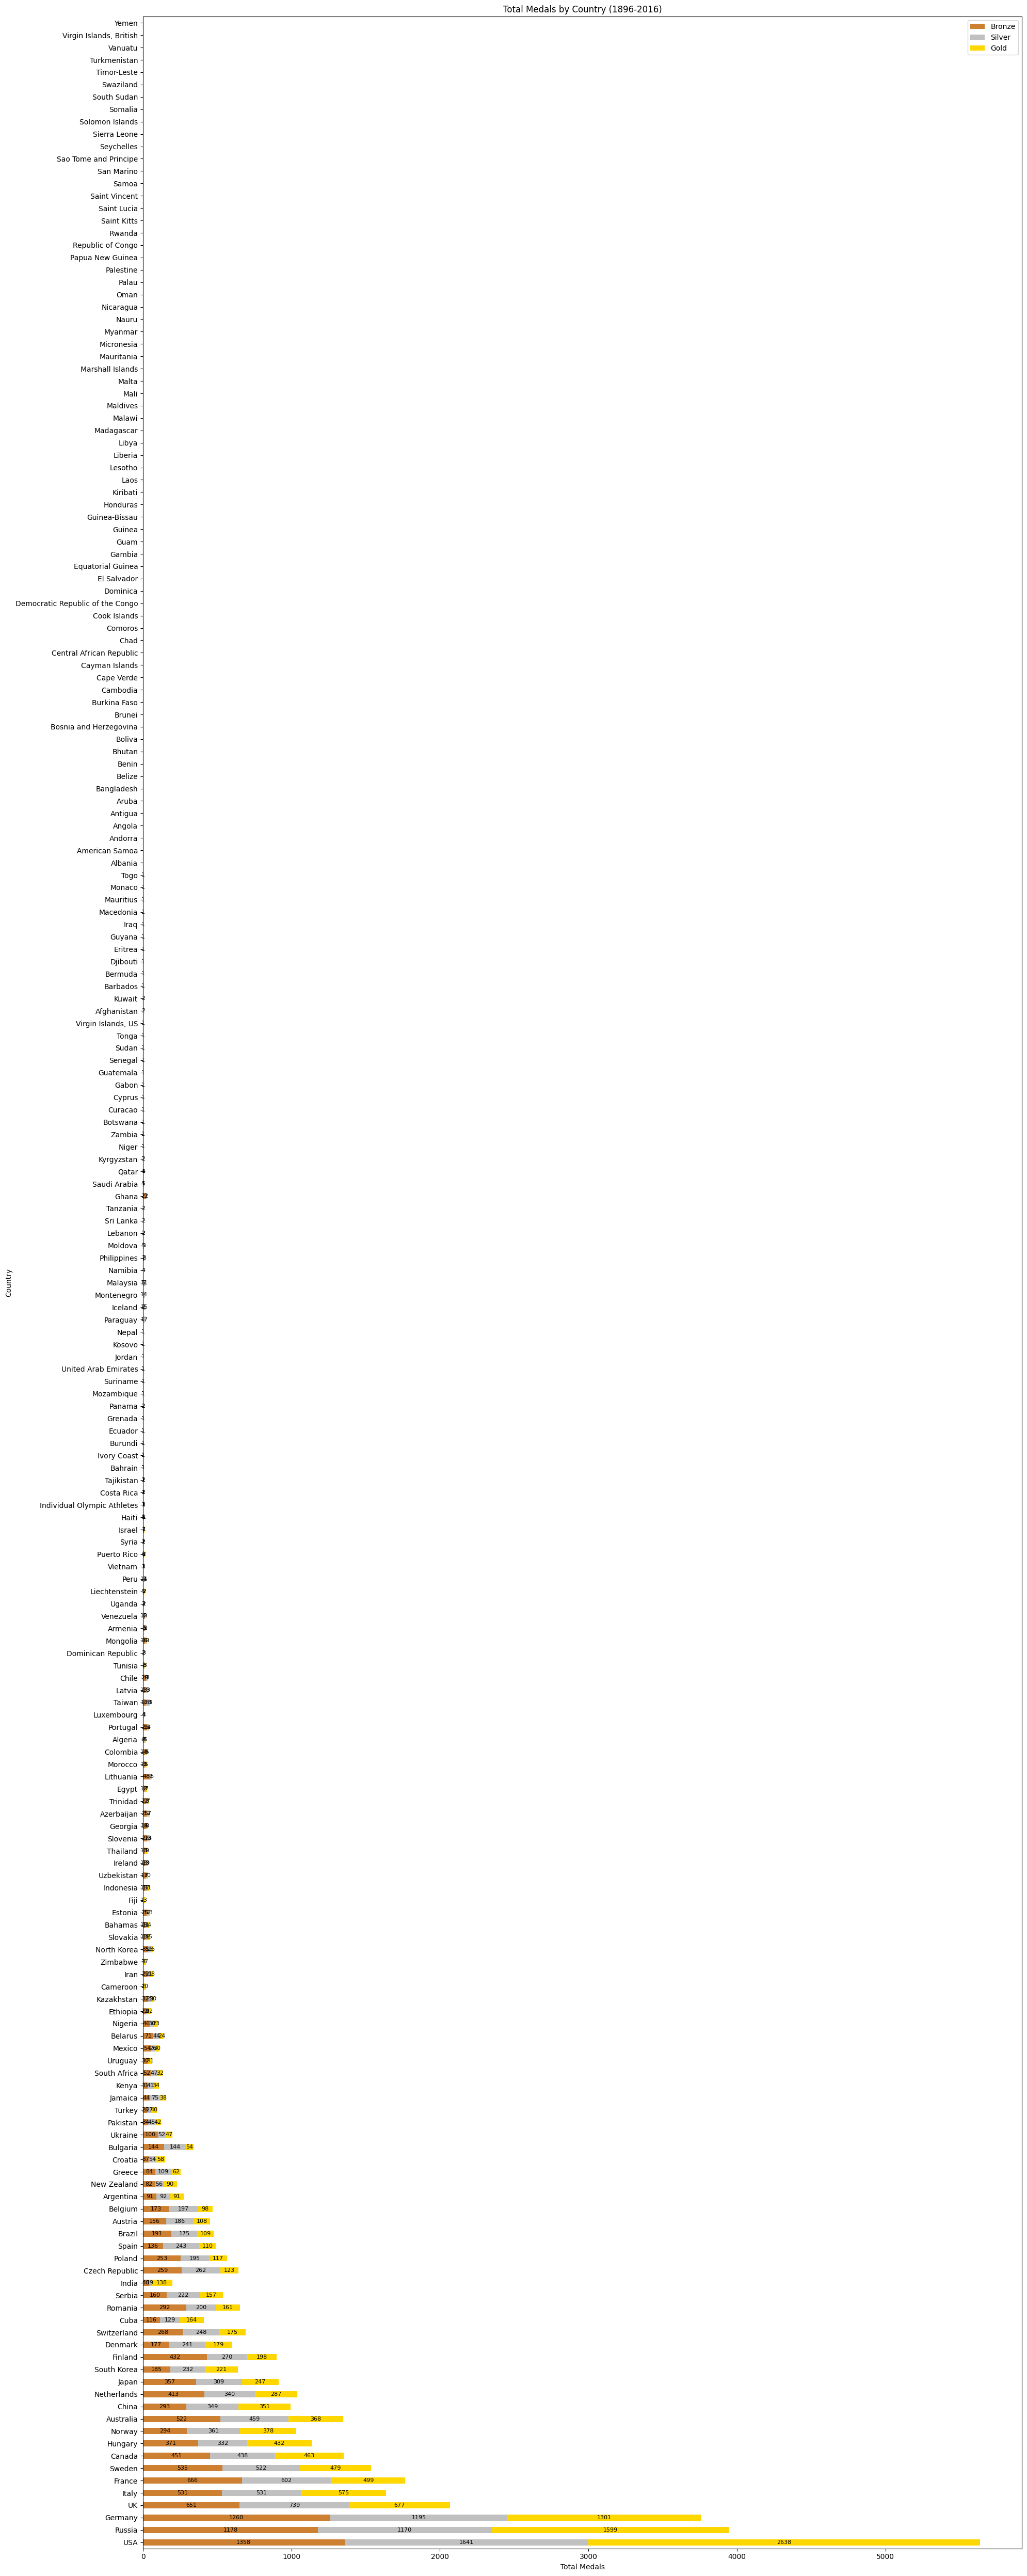

In [ ]:
# Group by 'region' and sum the medal counts
medal_counts = backup1.groupby('region')[['Gold', 'Silver', 'Bronze']].sum()

# Sort the medal counts in descending order
medal_counts = medal_counts.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=False)

# Plot the horizontal bar graph
fig, ax = plt.subplots(figsize=(20, 50))

# Plot each medal type
medal_counts[['Bronze', 'Silver', 'Gold']].plot(kind='barh', stacked=True, color=['#cd7f32', '#c0c0c0', '#ffd700'], ax=ax)

# Set labels and title
ax.set_xlabel('Total Medals')
ax.set_ylabel('Country')
ax.set_title('Total Medals by Country (1896-2016)')

# Display the total medal count on the bars
for i in ax.patches:
    # Find the position for the text
    width = i.get_width()
    if width > 0:  # Only display text for non-zero values
        ax.text(i.get_x() + width / 2, i.get_y() + i.get_height() / 2, str(int(width)),
                fontsize=8, color='black', va='center', ha='center')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()

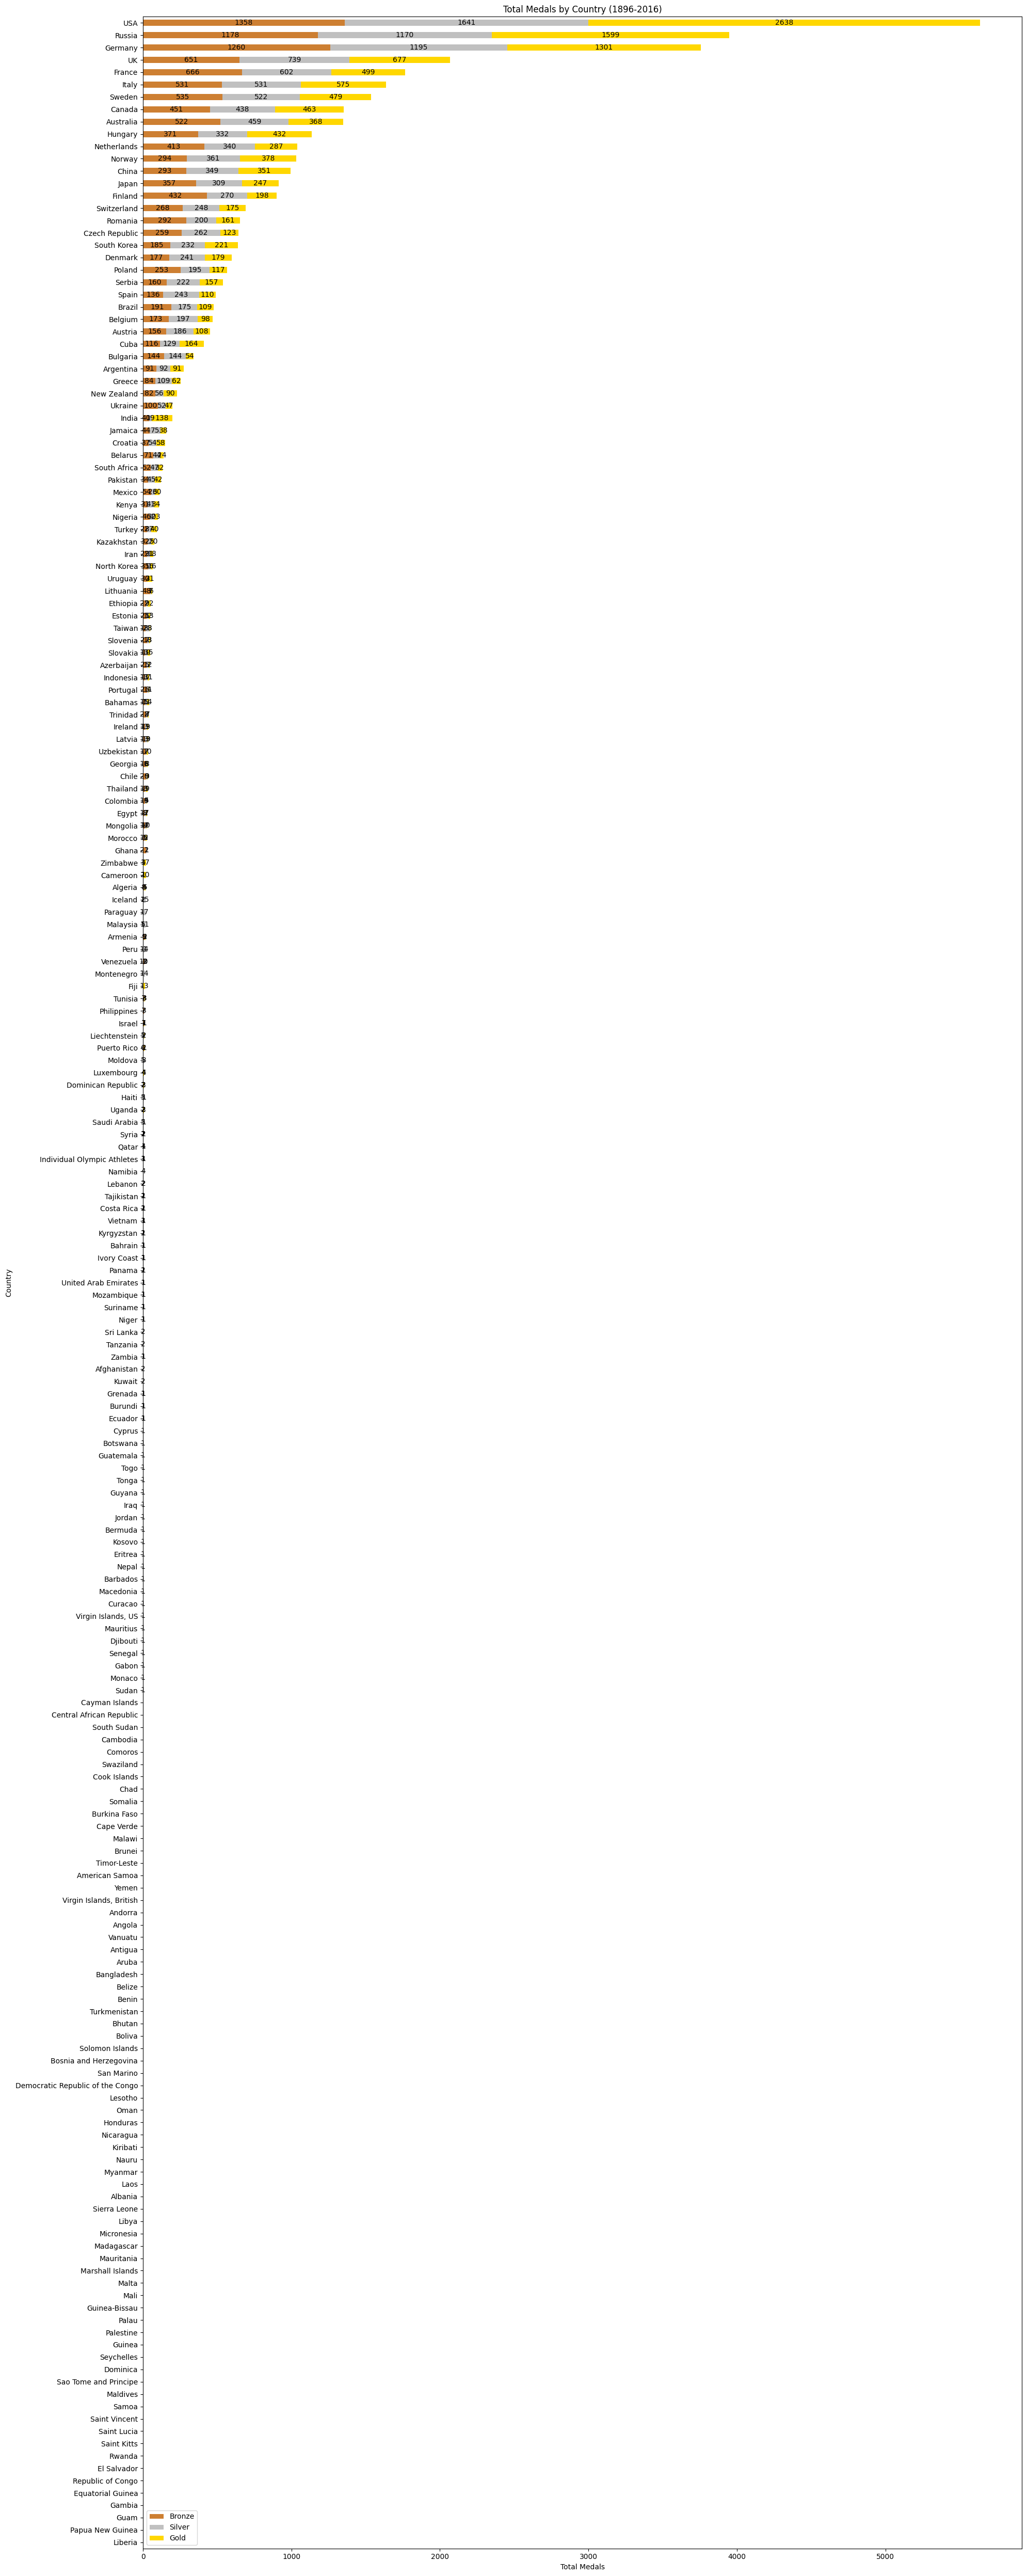

In [ ]:
import matplotlib.pyplot as plt

# Group by 'region' and sum the medal counts
medal_counts = backup1.groupby('region')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate the total medals for sorting
medal_counts['Total'] = medal_counts['Gold'] + medal_counts['Silver'] + medal_counts['Bronze']

# Sort the medal counts in descending order by total medals
medal_counts = medal_counts.sort_values(by='Total', ascending=False)

# Plot the horizontal bar graph
fig, ax = plt.subplots(figsize=(20, 50))

# Plot each medal type
medal_counts[['Bronze', 'Silver', 'Gold']].plot(kind='barh', stacked=True, color=['#cd7f32', '#c0c0c0', '#ffd700'], ax=ax)

# Set labels and title
ax.set_xlabel('Total Medals')
ax.set_ylabel('Country')
ax.set_title('Total Medals by Country (1896-2016)')

# Display the total medal count on the bars
for i in ax.patches:
    # Find the position for the text
    width = i.get_width()
    if width > 0:  # Only display text for non-zero values
        ax.text(i.get_x() + width / 2, i.get_y() + i.get_height() / 2, str(int(width)),
                fontsize=10, color='black', va='center', ha='center')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Invert the y-axis to display the highest medal count at the top
ax.invert_yaxis()

# Show the plot
plt.show()

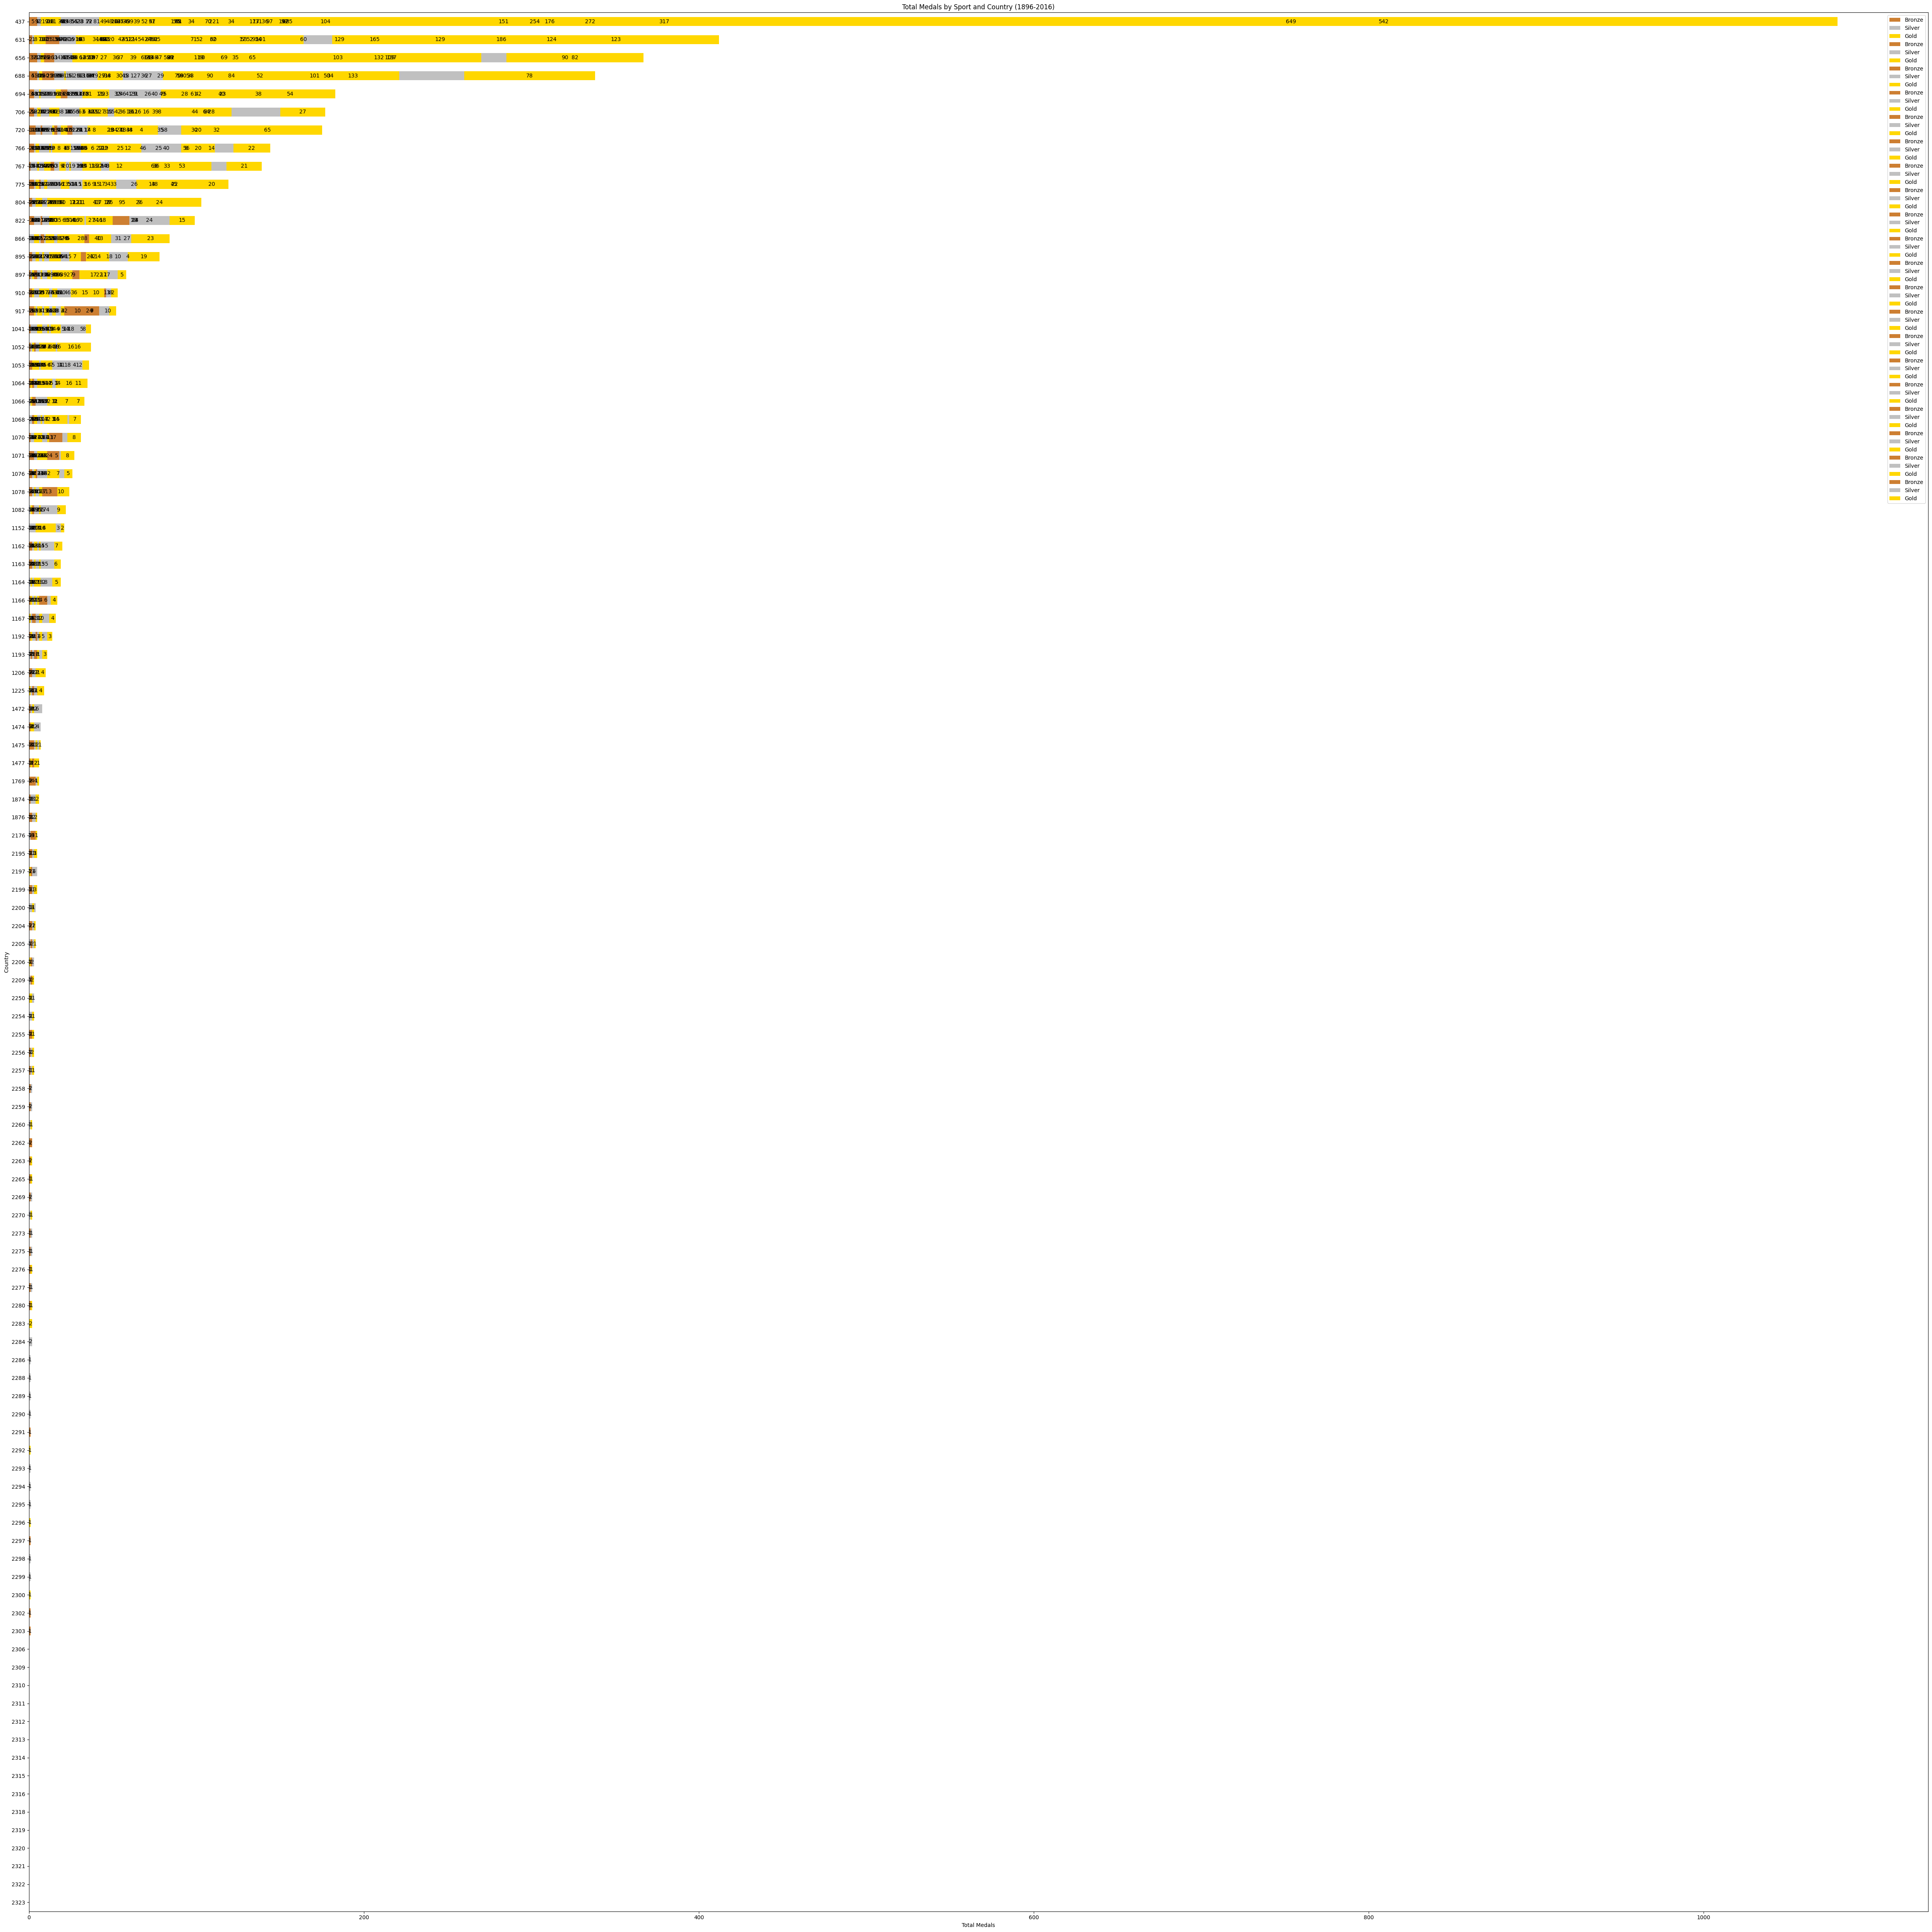

In [ ]:
# Group by 'Sport' and sum the medal counts for each country
sport_medal_counts = backup1.groupby(['Sport', 'region'])[['Gold', 'Silver', 'Bronze']].sum()

# Calculate the total medals for sorting
sport_medal_counts['Total'] = sport_medal_counts['Gold'] + sport_medal_counts['Silver'] + sport_medal_counts['Bronze']

# Sort the medal counts in descending order by total medals
sport_medal_counts = sport_medal_counts.sort_values(by='Total', ascending=False)

# Reset index to get 'Sport' and 'region' as columns
sport_medal_counts = sport_medal_counts.reset_index()

# Limit the number of sports to display (e.g., top 20 sports)
top_sports = sport_medal_counts['Sport'].value_counts().index[:20]
filtered_sport_medal_counts = sport_medal_counts[sport_medal_counts['Sport'].isin(top_sports)]

# Plot the horizontal bar graph
fig, ax = plt.subplots(figsize=(50, 50))

# Plot each medal type
for sport in filtered_sport_medal_counts['Sport'].unique():
    sport_data = filtered_sport_medal_counts[filtered_sport_medal_counts['Sport'] == sport]
    sport_data[['Bronze', 'Silver', 'Gold']].plot(kind='barh', stacked=True, color=['#cd7f32', '#c0c0c0', '#ffd700'], ax=ax, label=sport)

# Set labels and title
ax.set_xlabel('Total Medals')
ax.set_ylabel('Country')
ax.set_title('Total Medals by Sport and Country (1896-2016)')

# Display the total medal count on the bars
for i in ax.patches:
    # Find the position for the text
    width = i.get_width()
    if width > 0:  # Only display text for non-zero values
        ax.text(i.get_x() + width / 2, i.get_y() + i.get_height() / 2, str(int(width)),
                fontsize=10, color='black', va='center', ha='center')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Invert the y-axis to display the highest medal count at the top
ax.invert_yaxis()

# Show the plot
plt.show()

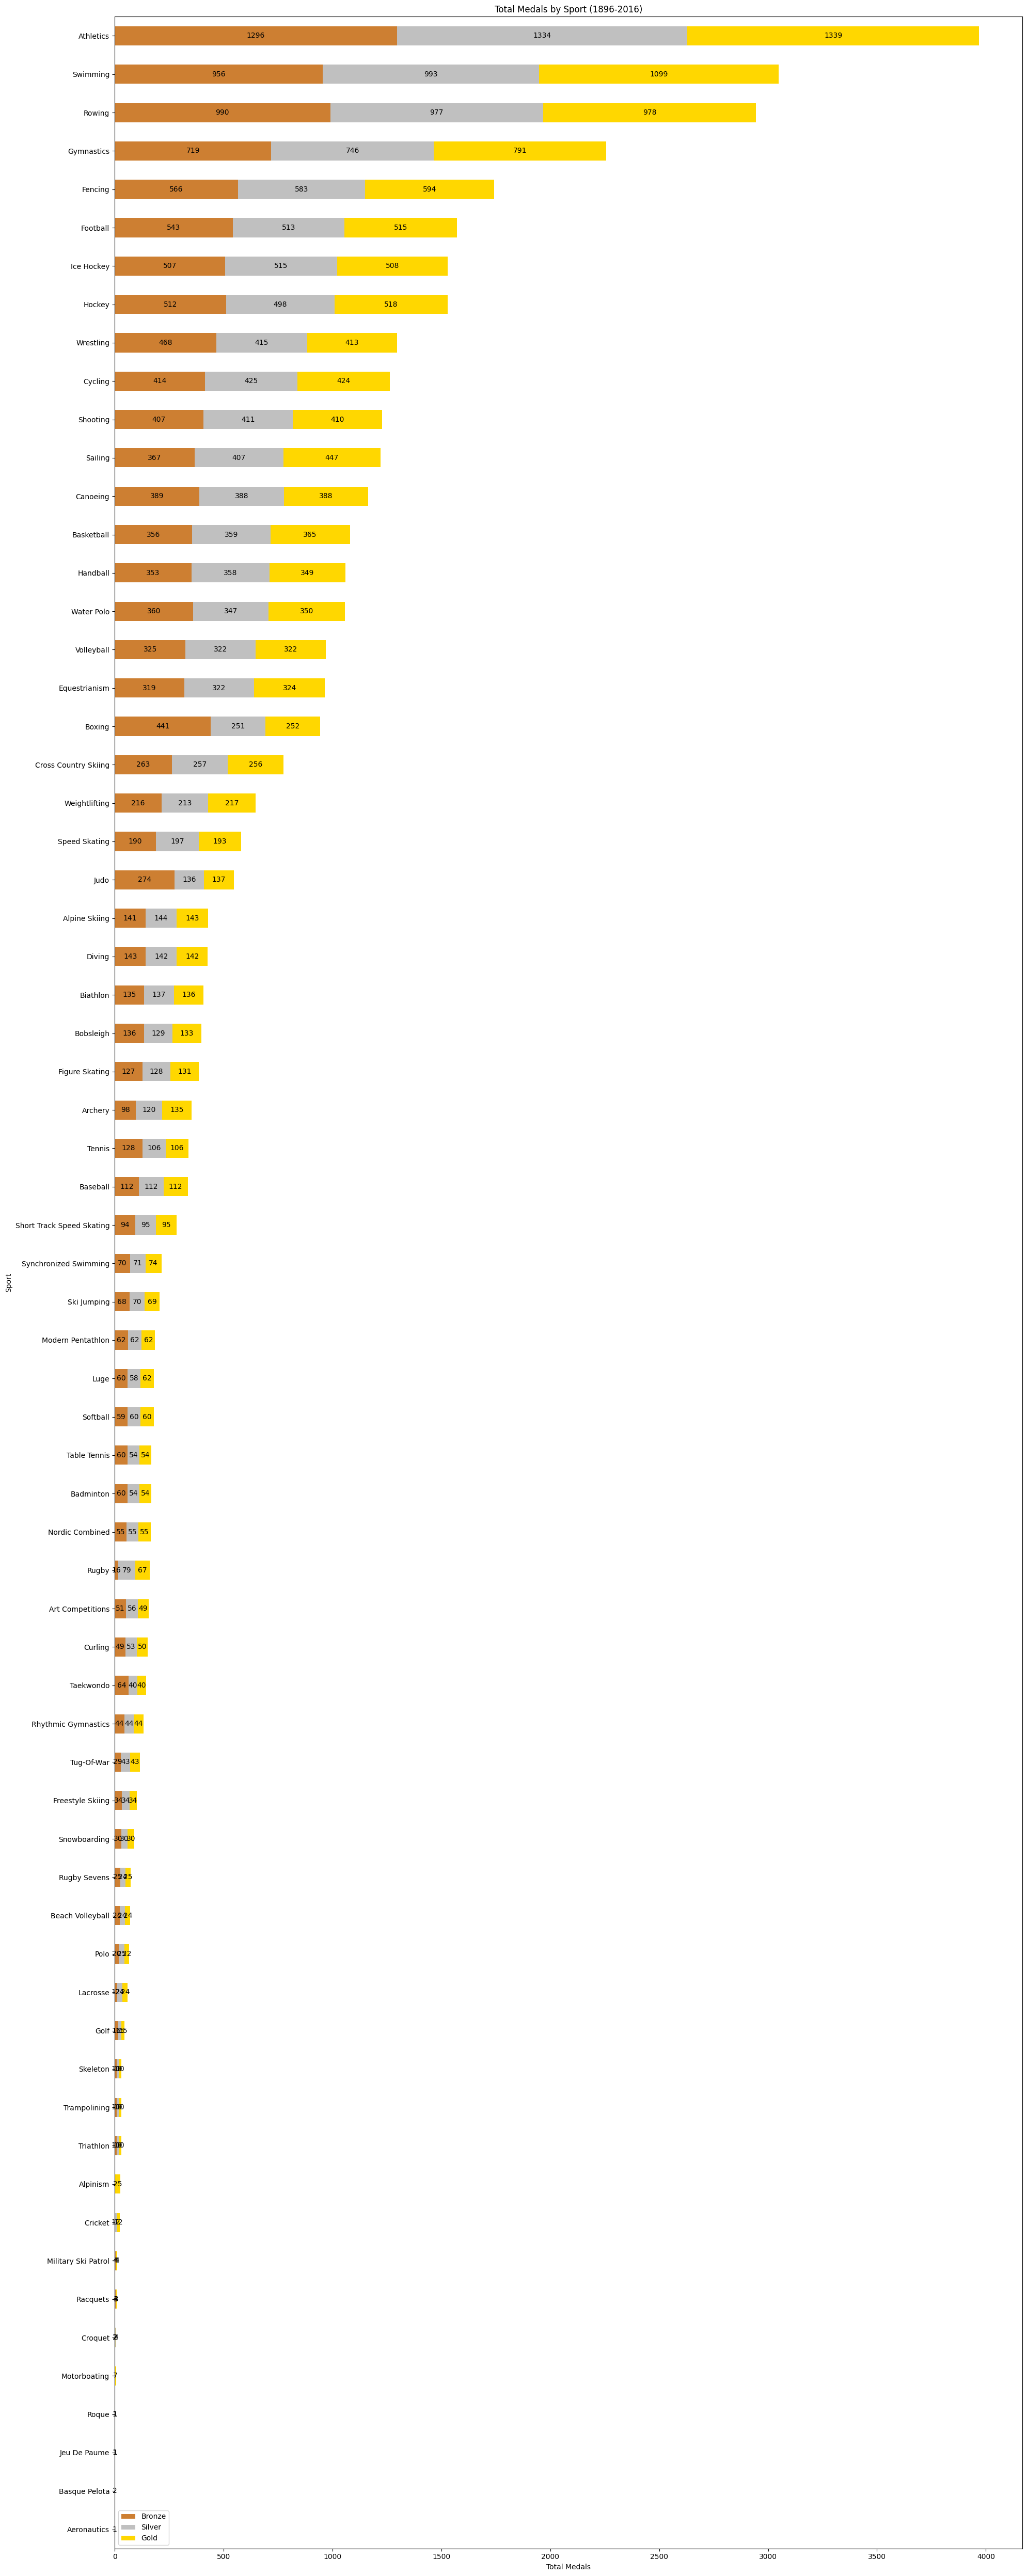

In [ ]:
# Group by 'Sport' and sum the medal counts
sport_medal_counts = backup1.groupby('Sport')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate the total medals for sorting
sport_medal_counts['Total'] = sport_medal_counts['Gold'] + sport_medal_counts['Silver'] + sport_medal_counts['Bronze']

# Sort the medal counts in descending order by total medals
sport_medal_counts = sport_medal_counts.sort_values(by='Total', ascending=False)

# Plot the horizontal bar graph
fig, ax = plt.subplots(figsize=(20, 50))

# Plot each medal type
sport_medal_counts[['Bronze', 'Silver', 'Gold']].plot(kind='barh', stacked=True, color=['#cd7f32', '#c0c0c0', '#ffd700'], ax=ax)

# Set labels and title
ax.set_xlabel('Total Medals')
ax.set_ylabel('Sport')
ax.set_title('Total Medals by Sport (1896-2016)')

# Display the total medal count on the bars
for i in ax.patches:
    # Find the position for the text
    width = i.get_width()
    if width > 0:  # Only display text for non-zero values
        ax.text(i.get_x() + width / 2, i.get_y() + i.get_height() / 2, str(int(width)),
                fontsize=10, color='black', va='center', ha='center')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Invert the y-axis to display the highest medal count at the top
ax.invert_yaxis()

# Show the plot
plt.show()

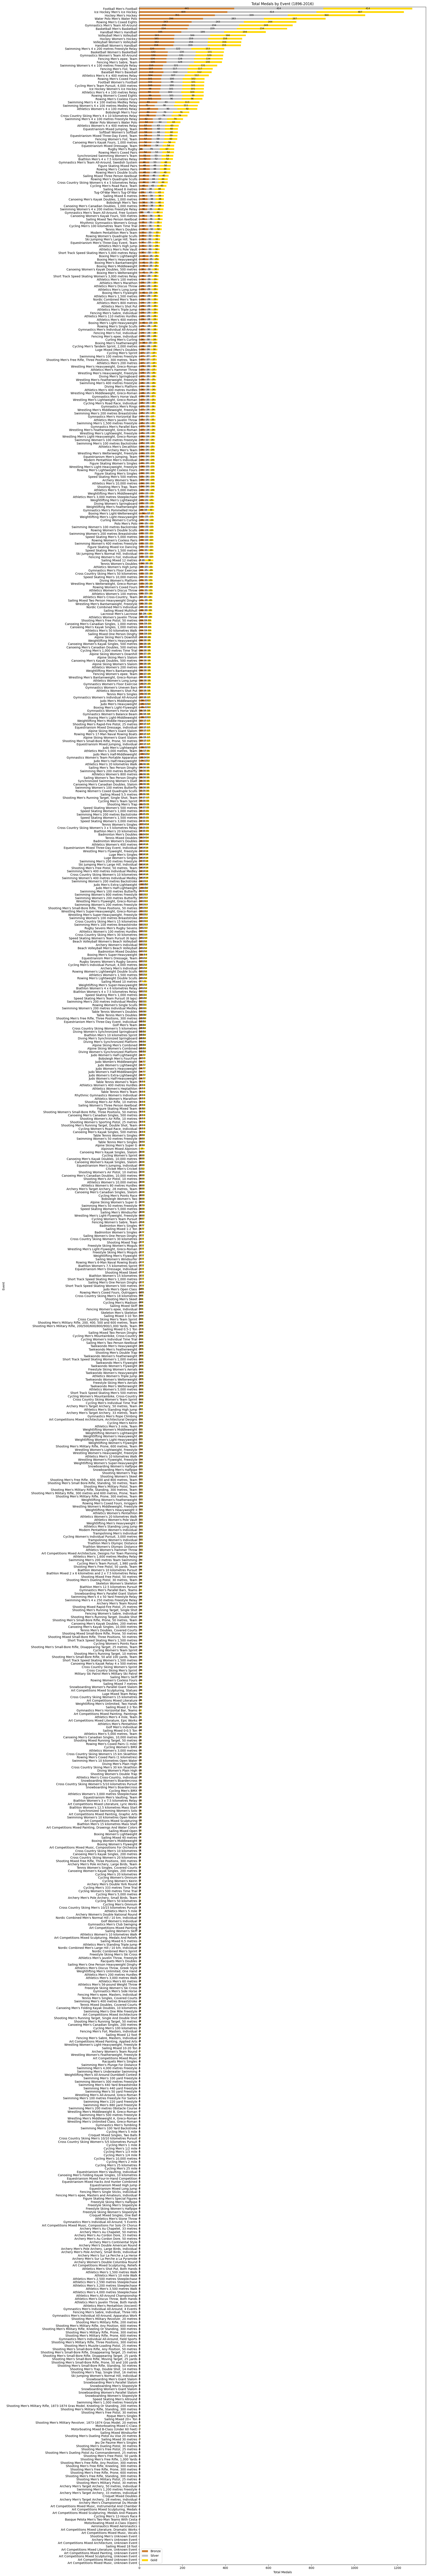

In [ ]:
# Group by 'Event' and sum the medal counts
event_medal_counts = backup1.groupby('Event')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate the total medals for sorting
event_medal_counts['Total'] = event_medal_counts['Gold'] + event_medal_counts['Silver'] + event_medal_counts['Bronze']

# Sort the medal counts in descending order by total medals
event_medal_counts = event_medal_counts.sort_values(by='Total', ascending=False)

# Plot the horizontal bar graph
fig, ax = plt.subplots(figsize=(20, 120))

# Plot each medal type
event_medal_counts[['Bronze', 'Silver', 'Gold']].plot(kind='barh', stacked=True, color=['#cd7f32', '#c0c0c0', '#ffd700'], ax=ax)

# Set labels and title
ax.set_xlabel('Total Medals')
ax.set_ylabel('Event')
ax.set_title('Total Medals by Event (1896-2016)')

# Display the total medal count on the bars
for i in ax.patches:
    # Find the position for the text
    width = i.get_width()
    if width > 0:  # Only display text for non-zero values
        ax.text(i.get_x() + width / 2, i.get_y() + i.get_height() / 2, str(int(width)),
                fontsize=8, color='black', va='center', ha='center')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Invert the y-axis to display the highest medal count at the top
ax.invert_yaxis()

# Show the plot
plt.show()

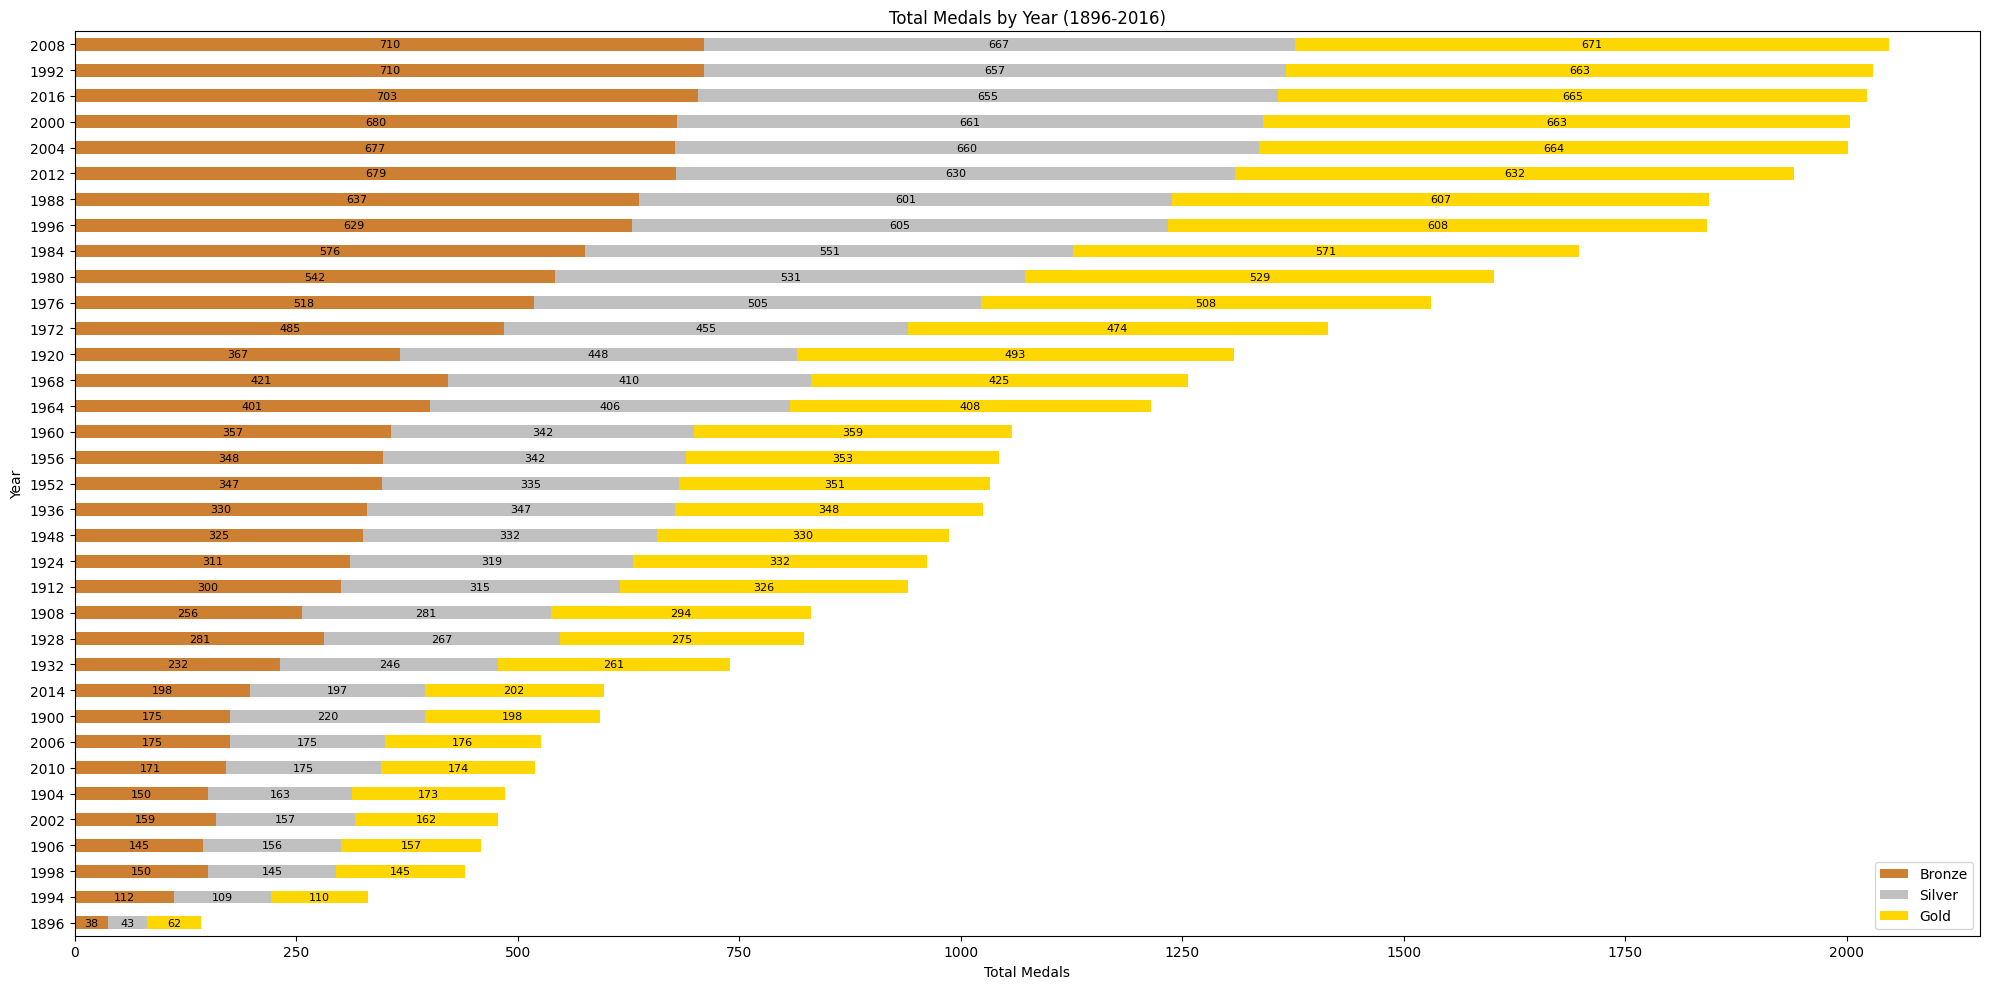

In [ ]:
# Group by 'Year' and sum the medal counts
year_medal_counts = backup1.groupby('Year')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate the total medals for sorting
year_medal_counts['Total'] = year_medal_counts['Gold'] + year_medal_counts['Silver'] + year_medal_counts['Bronze']

# Sort the medal counts in descending order by total medal count
year_medal_counts = year_medal_counts.sort_values(by='Total', ascending=False)

# Plot the horizontal bar graph
fig, ax = plt.subplots(figsize=(20, 10))

# Plot each medal type
year_medal_counts[['Bronze', 'Silver', 'Gold']].plot(kind='barh', stacked=True, color=['#cd7f32', '#c0c0c0', '#ffd700'], ax=ax)

# Set labels and title
ax.set_xlabel('Total Medals')
ax.set_ylabel('Year')
ax.set_title('Total Medals by Year (1896-2016)')

# Display the total medal count on the bars
for i in ax.patches:
    # Find the position for the text
    width = i.get_width()
    if width > 0:  # Only display text for non-zero values
        ax.text(i.get_x() + width / 2, i.get_y() + i.get_height() / 2, str(int(width)),
                fontsize=8, color='black', va='center', ha='center')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Invert the y-axis to display the highest medal count at the top
ax.invert_yaxis()

# Show the plot
plt.show()

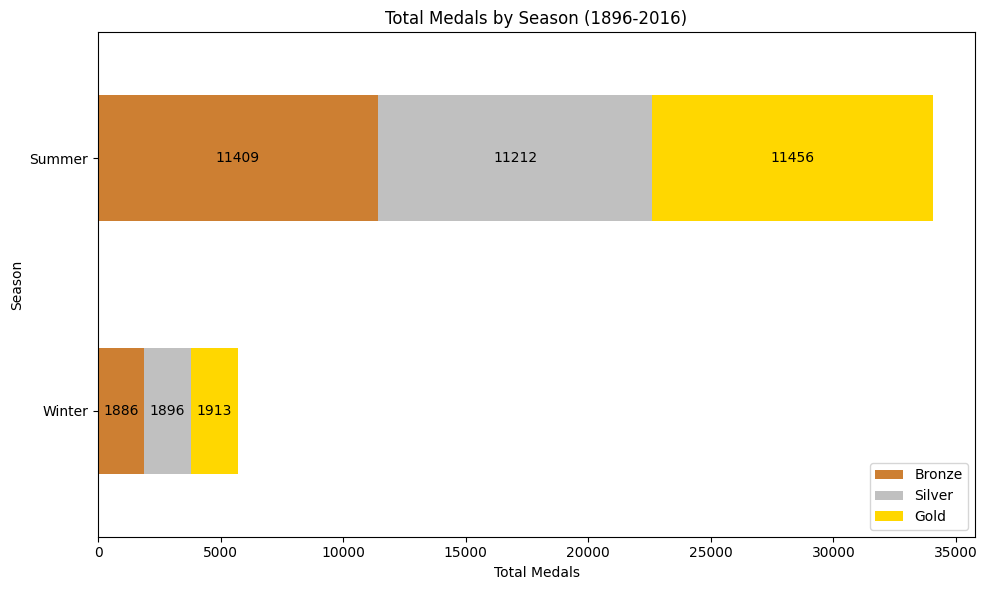

In [ ]:
# Group by 'Season' and sum the medal counts
season_medal_counts = backup1.groupby('Season')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate the total medals for sorting
season_medal_counts['Total'] = season_medal_counts['Gold'] + season_medal_counts['Silver'] + season_medal_counts['Bronze']

# Sort the medal counts in descending order by total medals
season_medal_counts = season_medal_counts.sort_values(by='Total', ascending=False)

# Plot the horizontal bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each medal type
season_medal_counts[['Bronze', 'Silver', 'Gold']].plot(kind='barh', stacked=True, color=['#cd7f32', '#c0c0c0', '#ffd700'], ax=ax)

# Set labels and title
ax.set_xlabel('Total Medals')
ax.set_ylabel('Season')
ax.set_title('Total Medals by Season (1896-2016)')

# Display the total medal count on the bars
for i in ax.patches:
    # Find the position for the text
    width = i.get_width()
    if width > 0:  # Only display text for non-zero values
        ax.text(i.get_x() + width / 2, i.get_y() + i.get_height() / 2, str(int(width)),
                fontsize=10, color='black', va='center', ha='center')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Invert the y-axis to display the highest medal count at the top
ax.invert_yaxis()

# Show the plot
plt.show()


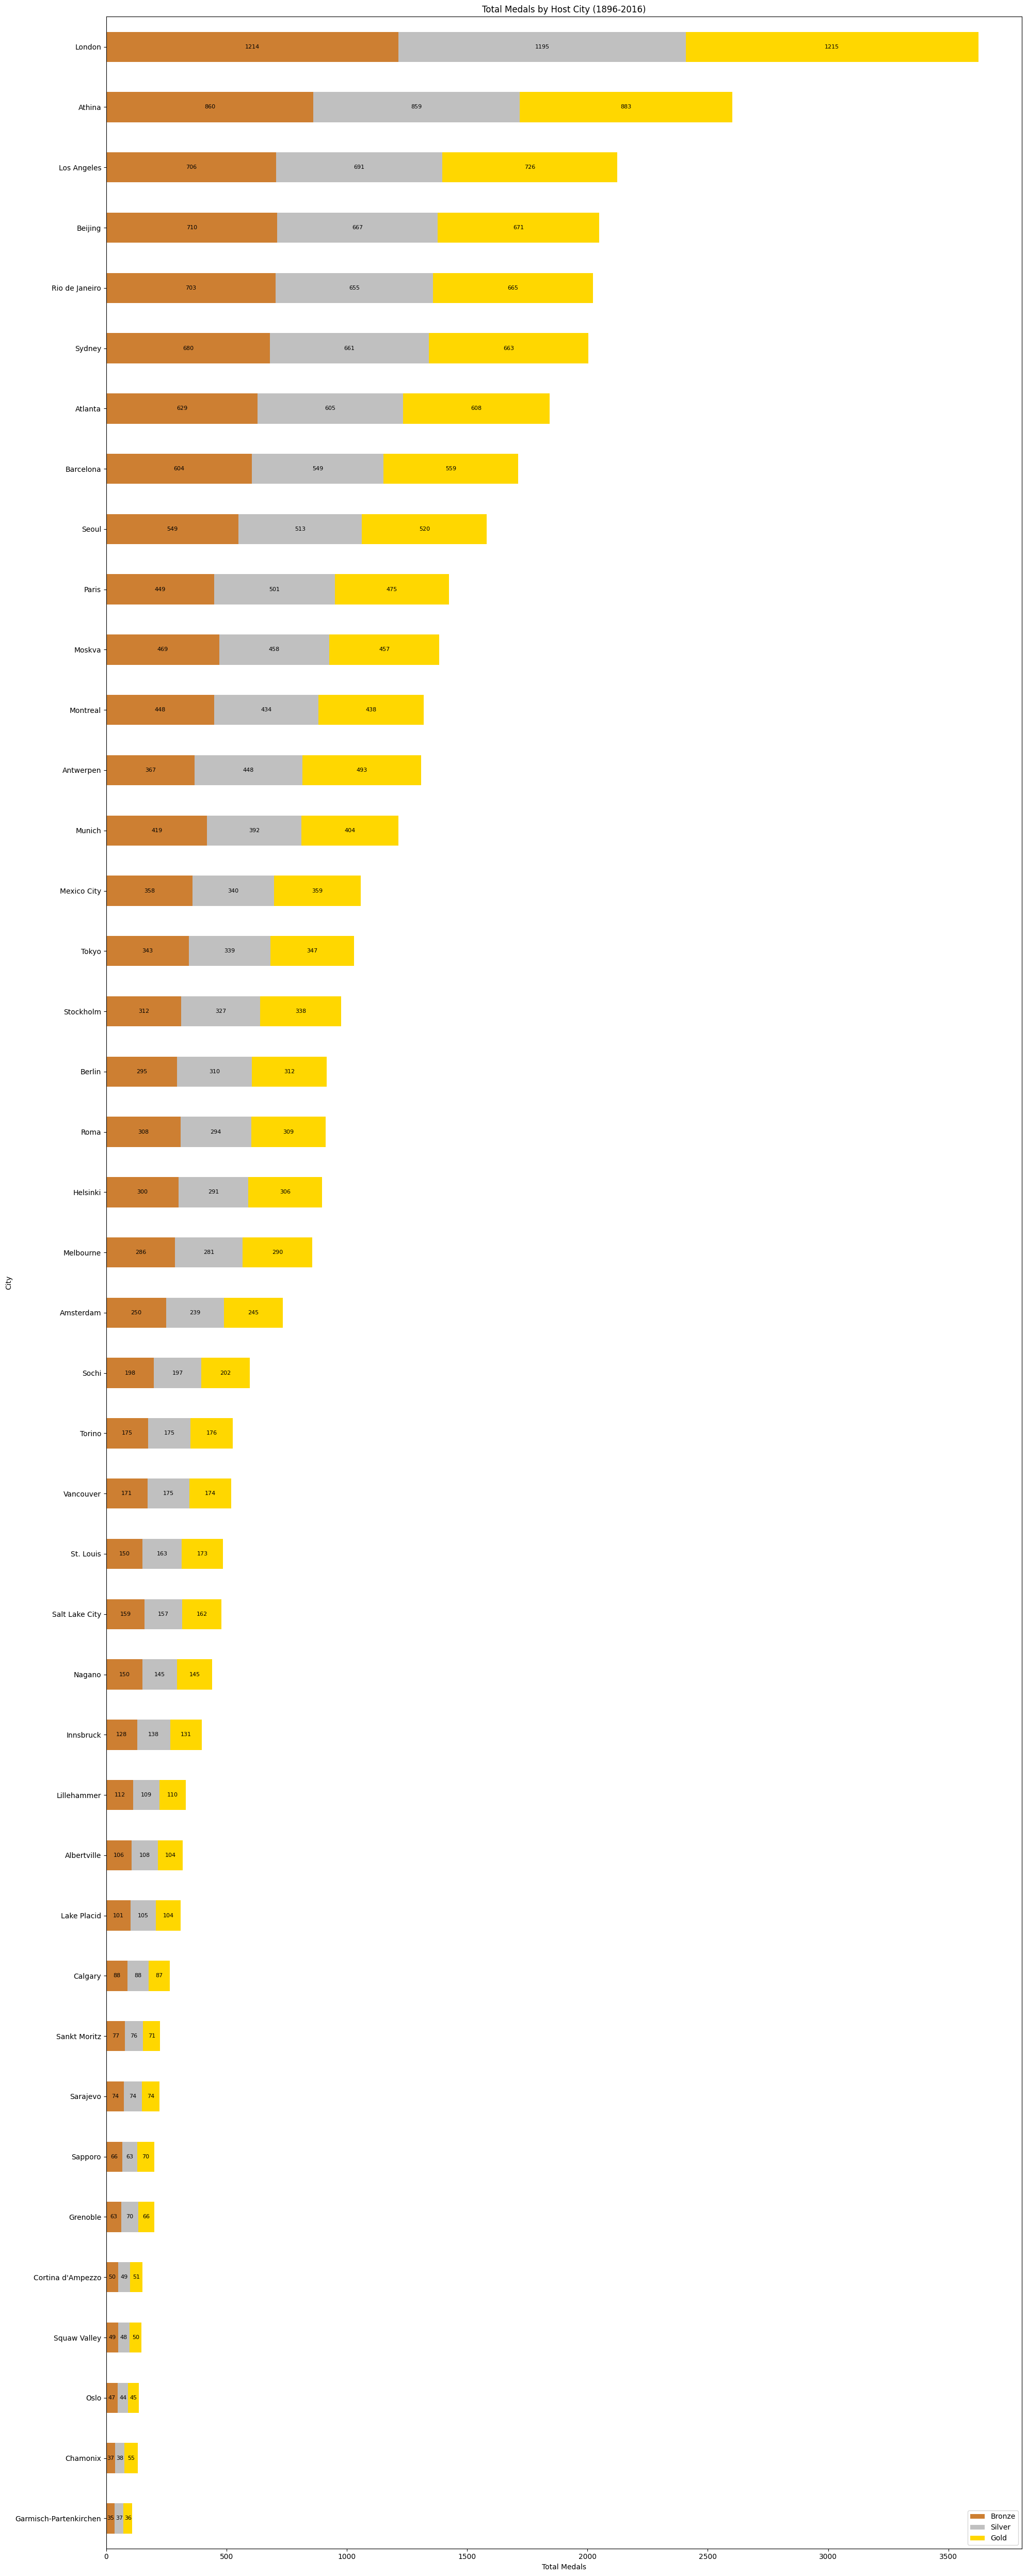

In [ ]:
# Group by 'City' and sum the medal counts
city_medal_counts = backup1.groupby('City')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate the total medals for sorting
city_medal_counts['Total'] = city_medal_counts['Gold'] + city_medal_counts['Silver'] + city_medal_counts['Bronze']

# Sort the medal counts in descending order by total medals
city_medal_counts = city_medal_counts.sort_values(by='Total', ascending=False)

# Plot the horizontal bar graph
fig, ax = plt.subplots(figsize=(20, 50))

# Plot each medal type
city_medal_counts[['Bronze', 'Silver', 'Gold']].plot(kind='barh', stacked=True, color=['#cd7f32', '#c0c0c0', '#ffd700'], ax=ax)

# Set labels and title
ax.set_xlabel('Total Medals')
ax.set_ylabel('City')
ax.set_title('Total Medals by Host City (1896-2016)')

# Display the total medal count on the bars
for i in ax.patches:
    # Find the position for the text
    width = i.get_width()
    if width > 0:  # Only display text for non-zero values
        ax.text(i.get_x() + width / 2, i.get_y() + i.get_height() / 2, str(int(width)),
                fontsize=8, color='black', va='center', ha='center')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Invert the y-axis to display the highest medal count at the top
ax.invert_yaxis()

# Show the plot
plt.show()

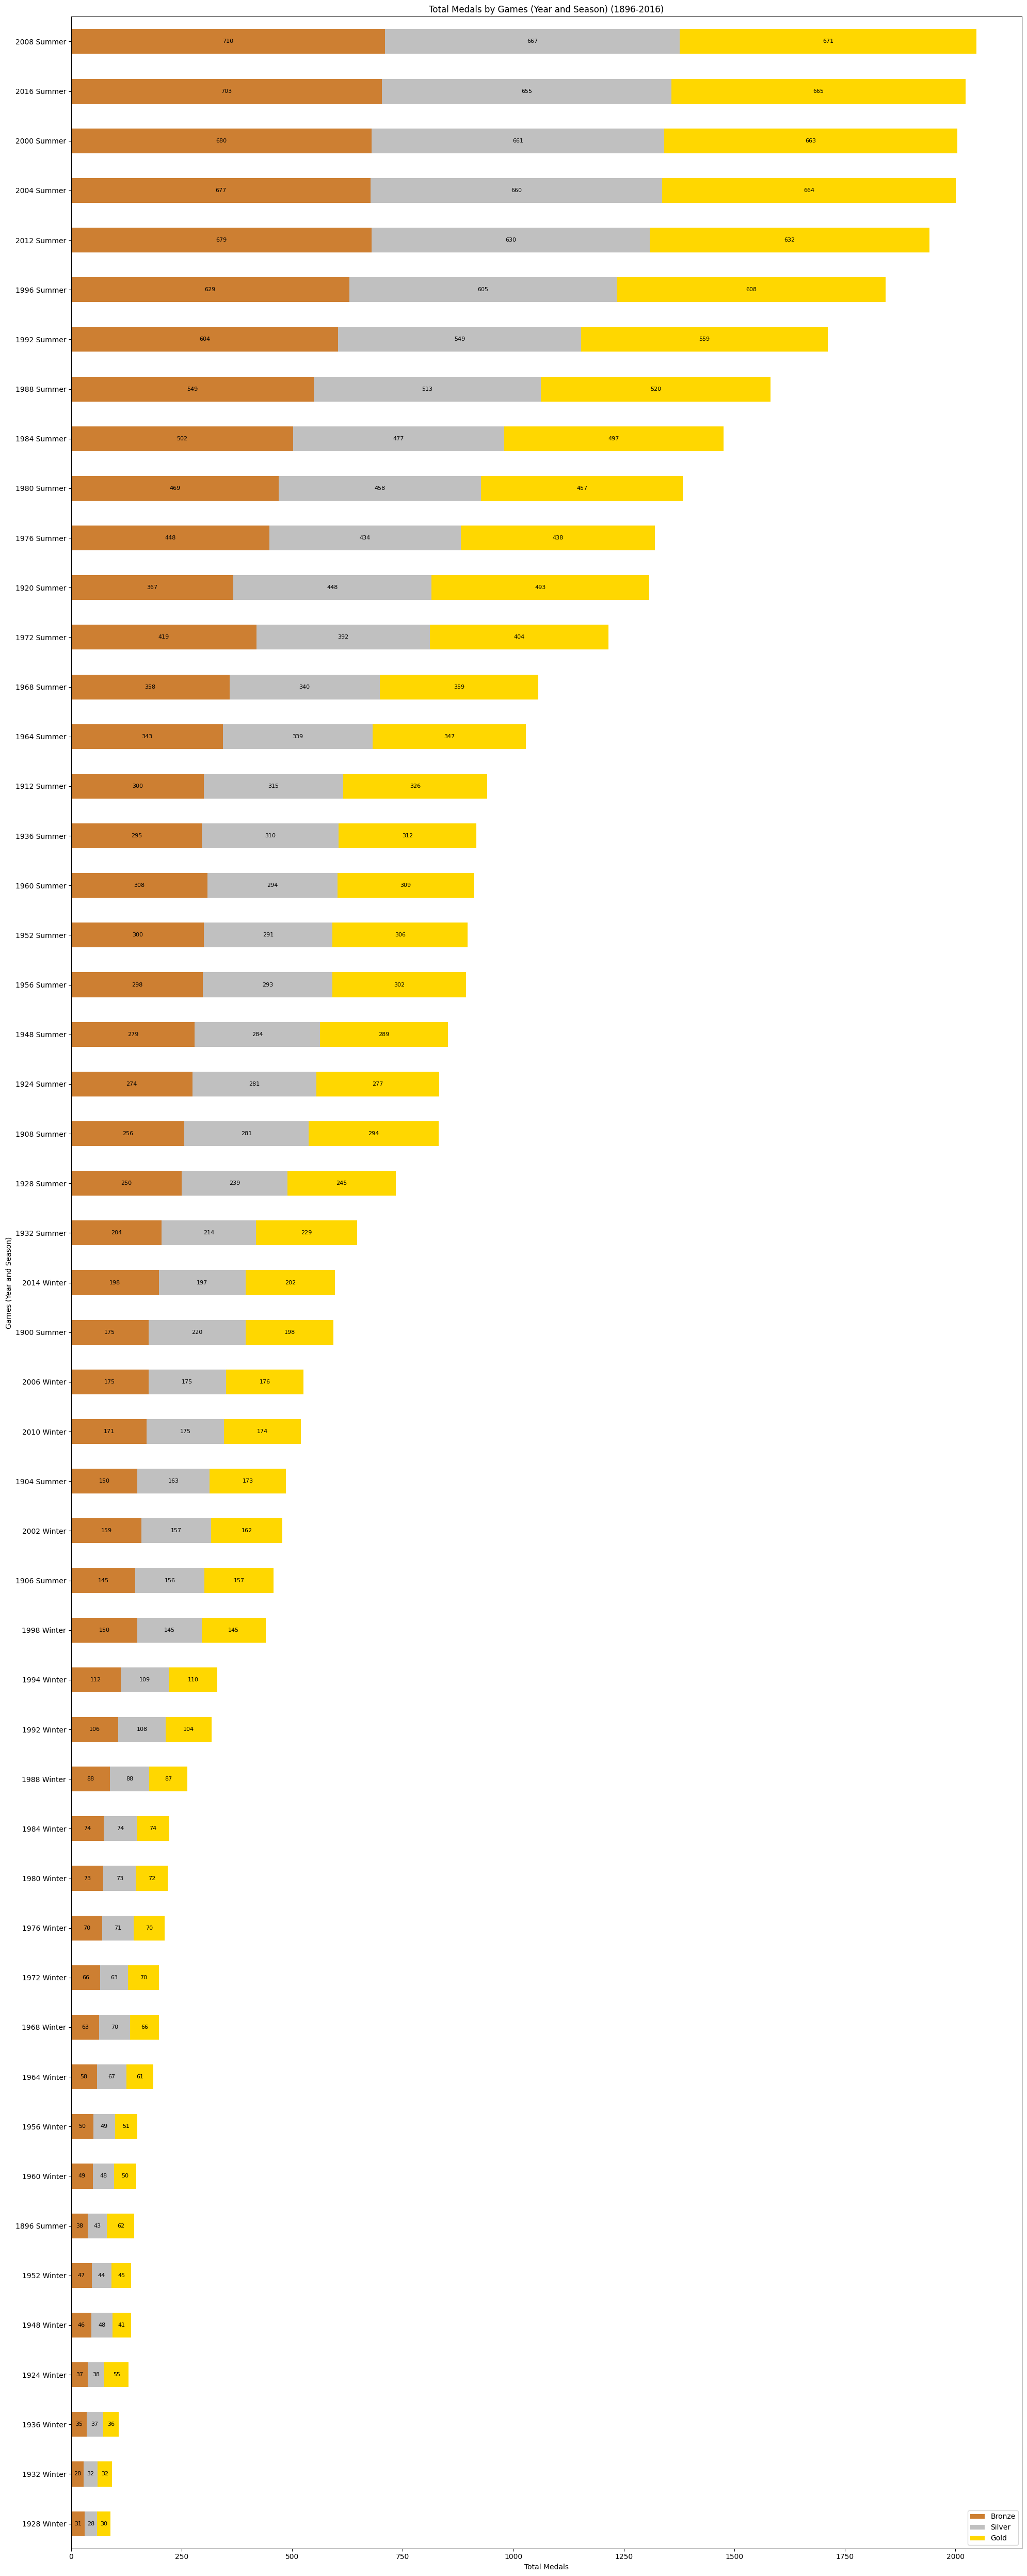

In [ ]:
# Group by 'Games' and sum the medal counts
games_medal_counts = backup1.groupby('Games')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate the total medals for sorting
games_medal_counts['Total'] = games_medal_counts['Gold'] + games_medal_counts['Silver'] + games_medal_counts['Bronze']

# Sort the medal counts in descending order by total medals
games_medal_counts = games_medal_counts.sort_values(by='Total', ascending=False)

# Plot the horizontal bar graph
fig, ax = plt.subplots(figsize=(20, 50))

# Plot each medal type
games_medal_counts[['Bronze', 'Silver', 'Gold']].plot(kind='barh', stacked=True, color=['#cd7f32', '#c0c0c0', '#ffd700'], ax=ax)

# Set labels and title
ax.set_xlabel('Total Medals')
ax.set_ylabel('Games (Year and Season)')
ax.set_title('Total Medals by Games (Year and Season) (1896-2016)')

# Display the total medal count on the bars
for i in ax.patches:
    # Find the position for the text
    width = i.get_width()
    if width > 0:  # Only display text for non-zero values
        ax.text(i.get_x() + width / 2, i.get_y() + i.get_height() / 2, str(int(width)),
                fontsize=8, color='black', va='center', ha='center')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Invert the y-axis to display the highest medal count at the top
ax.invert_yaxis()

# Show the plot
plt.show()


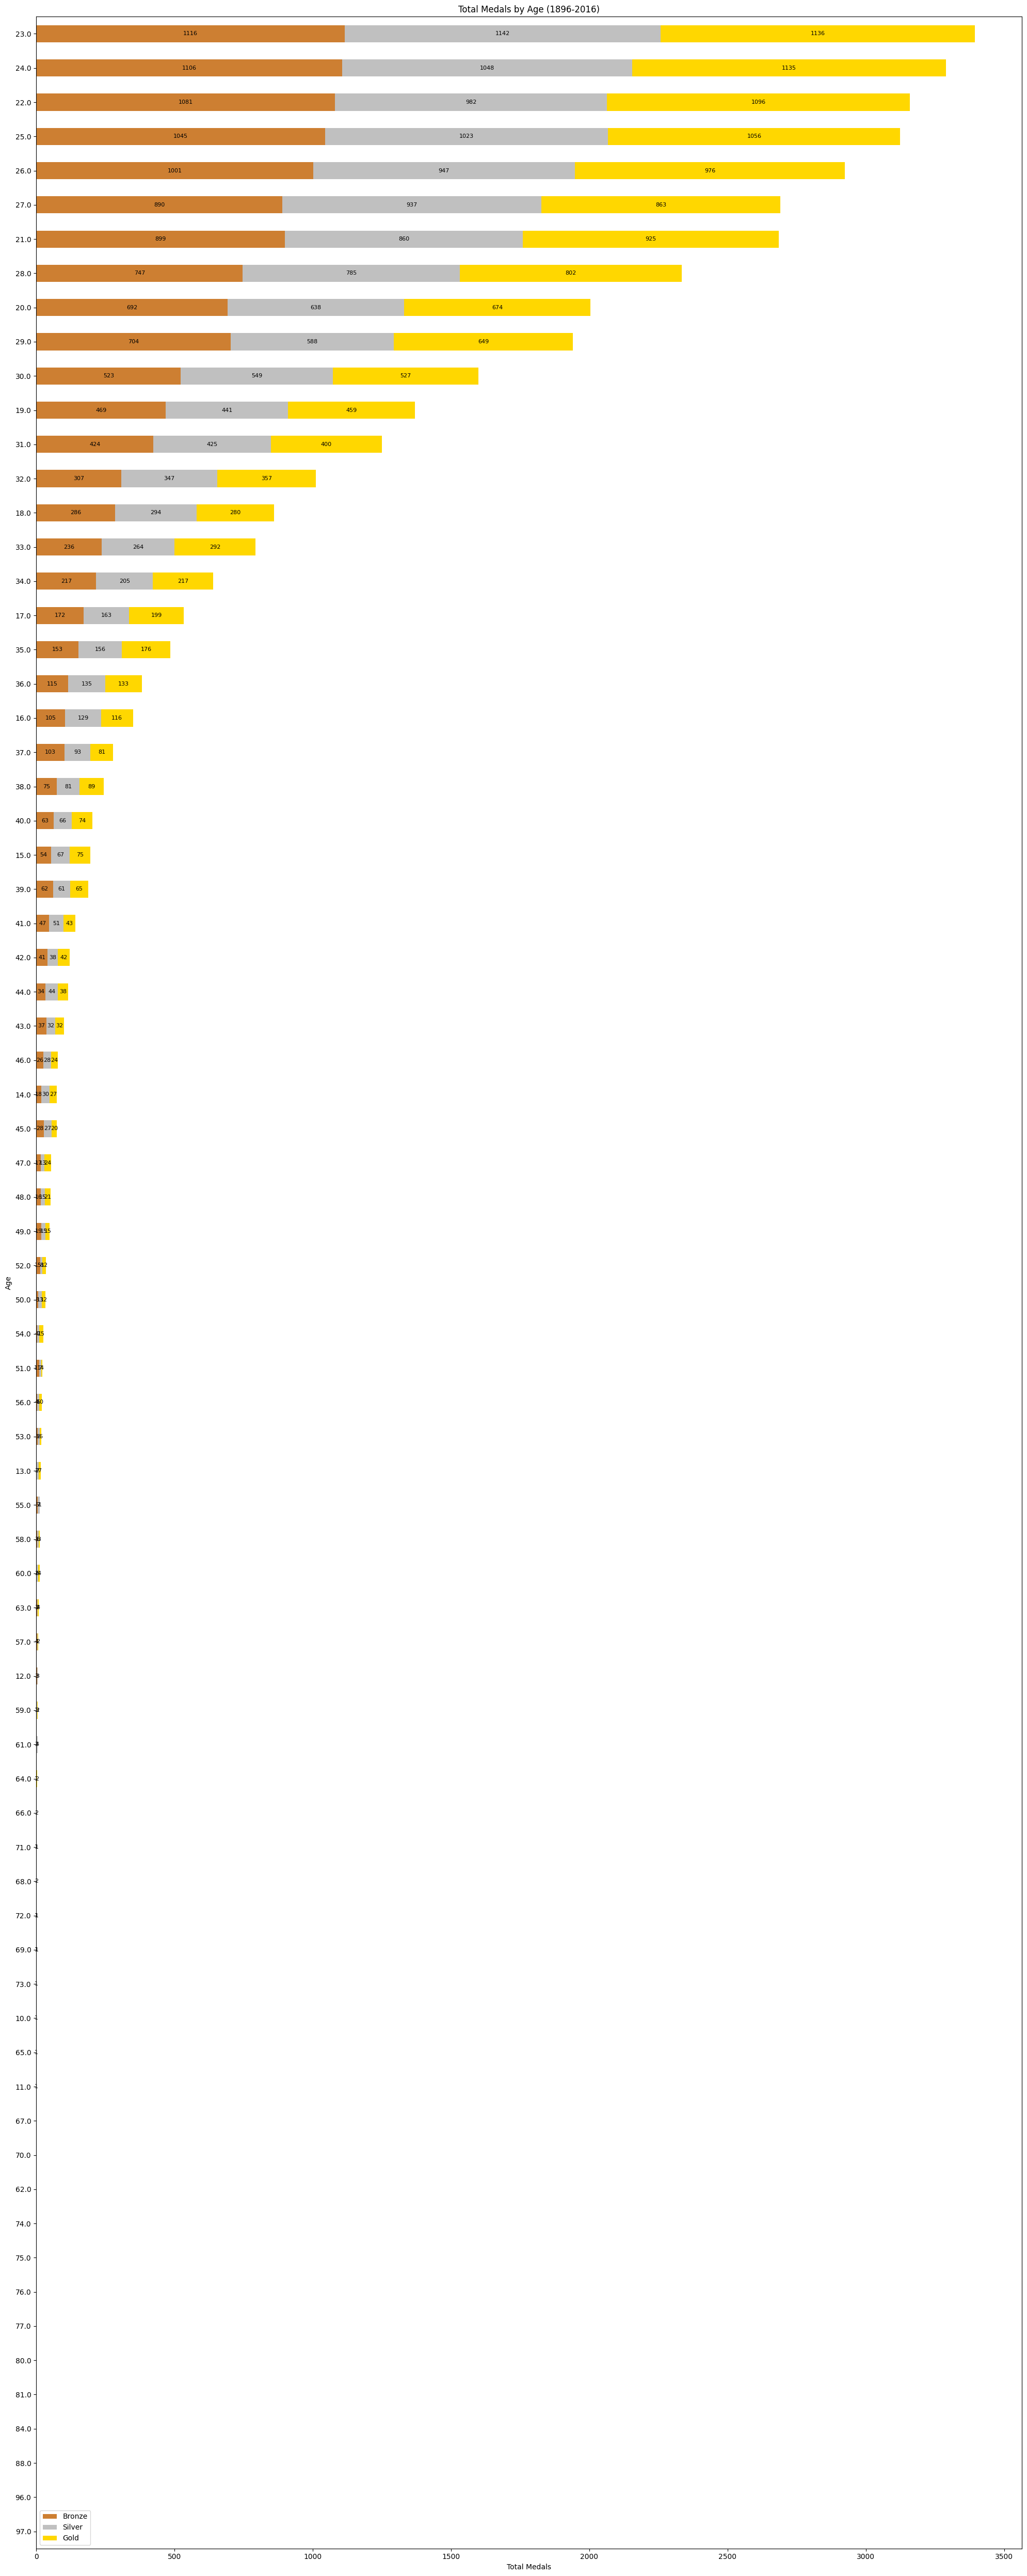

In [ ]:
# Group by 'Age' and sum the medal counts
age_medal_counts = backup1.groupby('Age')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate the total medals for sorting
age_medal_counts['Total'] = age_medal_counts['Gold'] + age_medal_counts['Silver'] + age_medal_counts['Bronze']

# Sort the medal counts in ascending order by total medal count
age_medal_counts = age_medal_counts.sort_values(by='Total', ascending=False)

# Plot the horizontal bar graph
fig, ax = plt.subplots(figsize=(20, 50))

# Plot each medal type
age_medal_counts[['Bronze', 'Silver', 'Gold']].plot(kind='barh', stacked=True, color=['#cd7f32', '#c0c0c0', '#ffd700'], ax=ax)

# Set labels and title
ax.set_xlabel('Total Medals')
ax.set_ylabel('Age')
ax.set_title('Total Medals by Age (1896-2016)')

# Display the total medal count on the bars
for i in ax.patches:
    # Find the position for the text
    width = i.get_width()
    if width > 0:  # Only display text for non-zero values
        ax.text(i.get_x() + width / 2, i.get_y() + i.get_height() / 2, str(int(width)),
                fontsize=8, color='black', va='center', ha='center')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Invert the y-axis to display the highest medal count at the top
ax.invert_yaxis()

# Show the plot
plt.show()

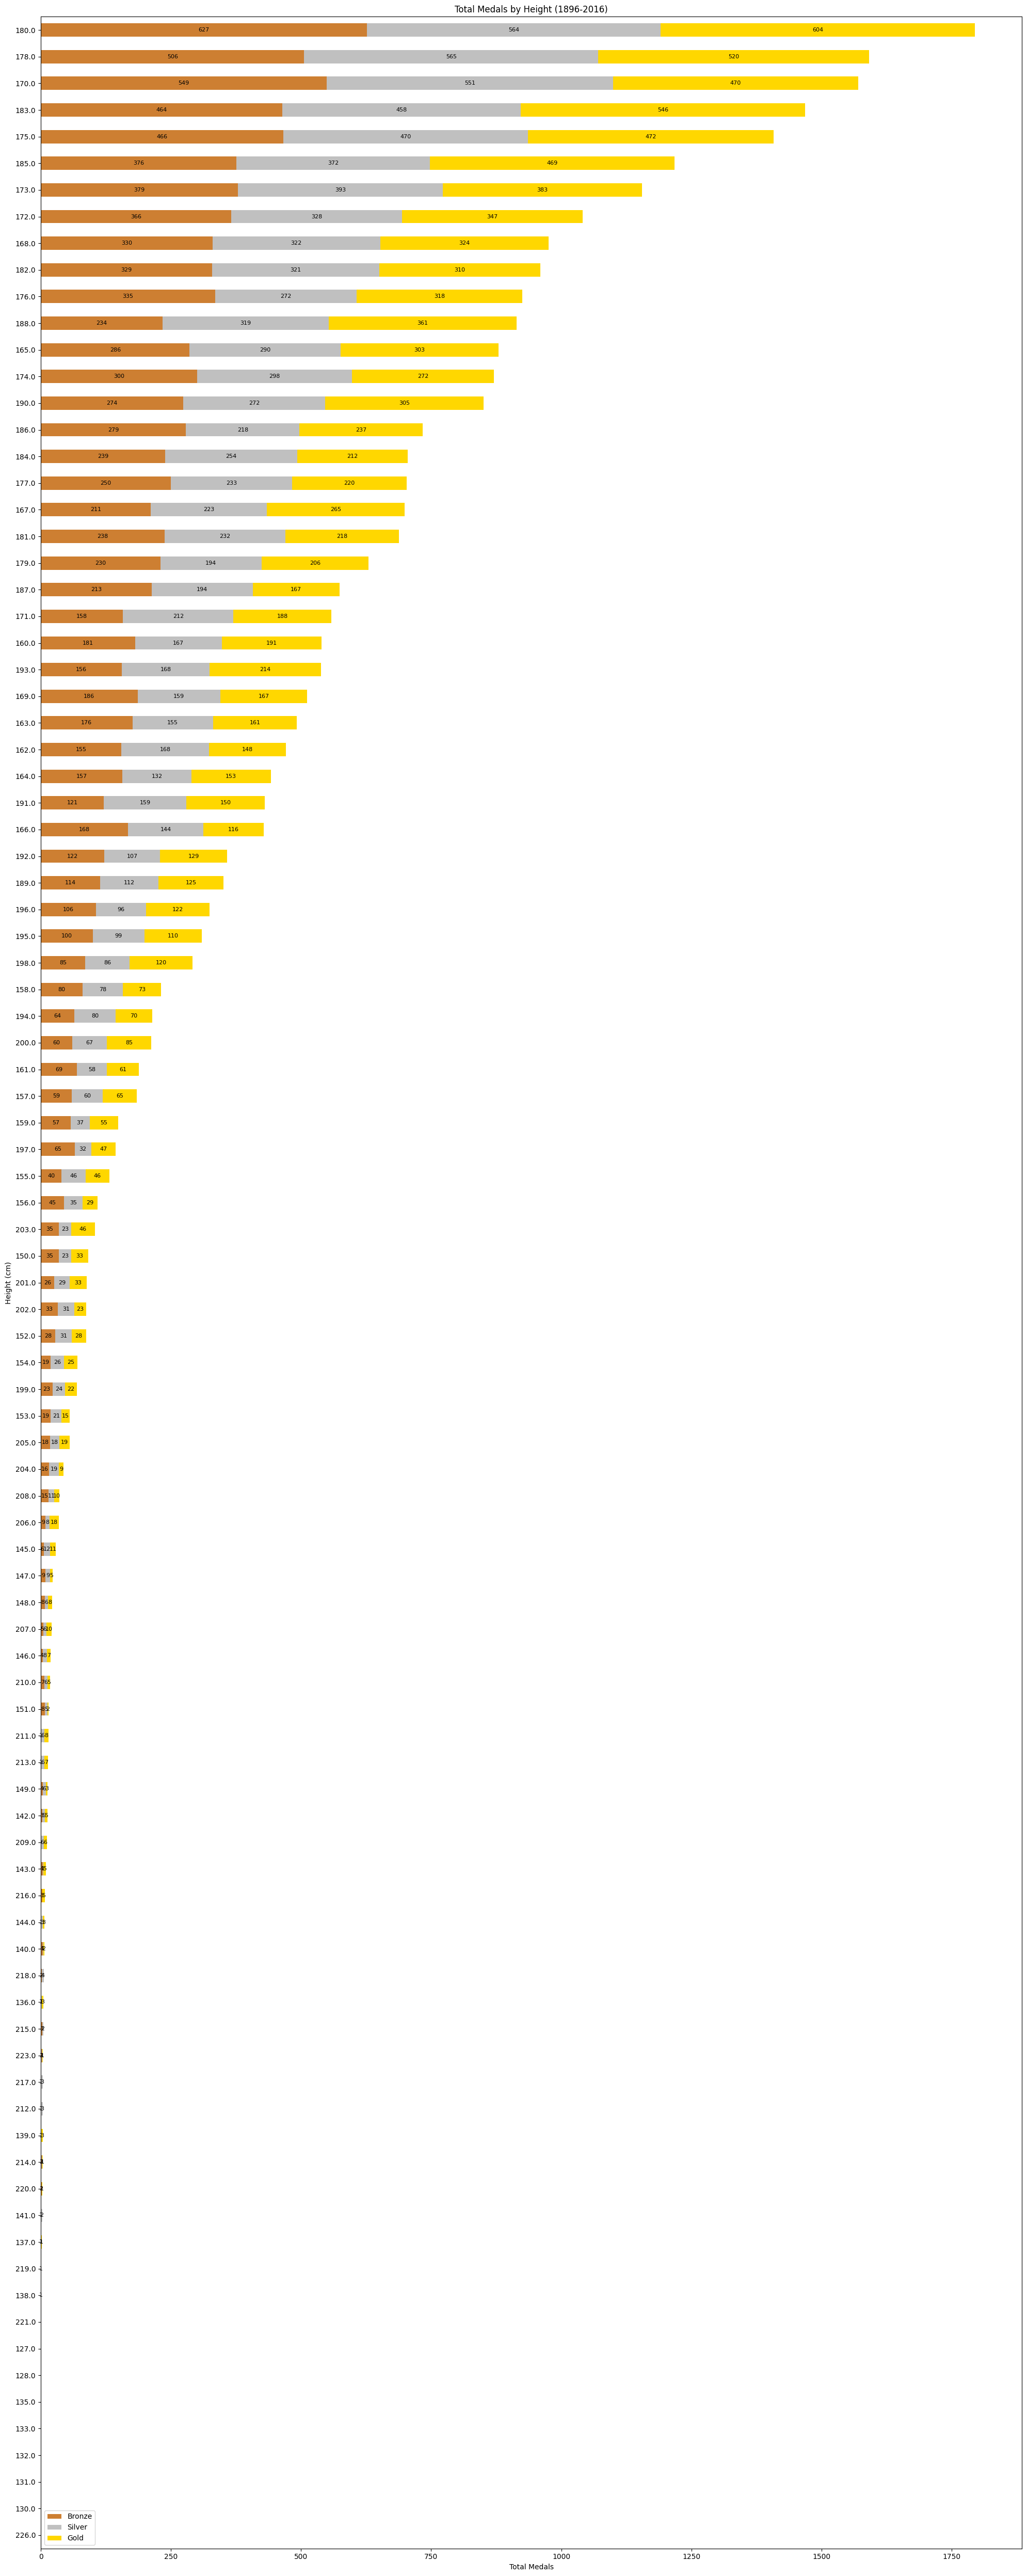

In [ ]:
# Group by 'Height' and sum the medal counts
height_medal_counts = backup1.groupby('Height')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate the total medals for sorting
height_medal_counts['Total'] = height_medal_counts['Gold'] + height_medal_counts['Silver'] + height_medal_counts['Bronze']

# Sort the medal counts in ascending order by total medal count
height_medal_counts = height_medal_counts.sort_values(by='Total', ascending=False)

# Plot the horizontal bar graph
fig, ax = plt.subplots(figsize=(20, 50))

# Plot each medal type
height_medal_counts[['Bronze', 'Silver', 'Gold']].plot(kind='barh', stacked=True, color=['#cd7f32', '#c0c0c0', '#ffd700'], ax=ax)

# Set labels and title
ax.set_xlabel('Total Medals')
ax.set_ylabel('Height (cm)')
ax.set_title('Total Medals by Height (1896-2016)')

# Display the total medal count on the bars
for i in ax.patches:
    # Find the position for the text
    width = i.get_width()
    if width > 0:  # Only display text for non-zero values
        ax.text(i.get_x() + width / 2, i.get_y() + i.get_height() / 2, str(int(width)),
                fontsize=8, color='black', va='center', ha='center')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Invert the y-axis to display the highest medal count at the top
ax.invert_yaxis()

# Show the plot
plt.show()

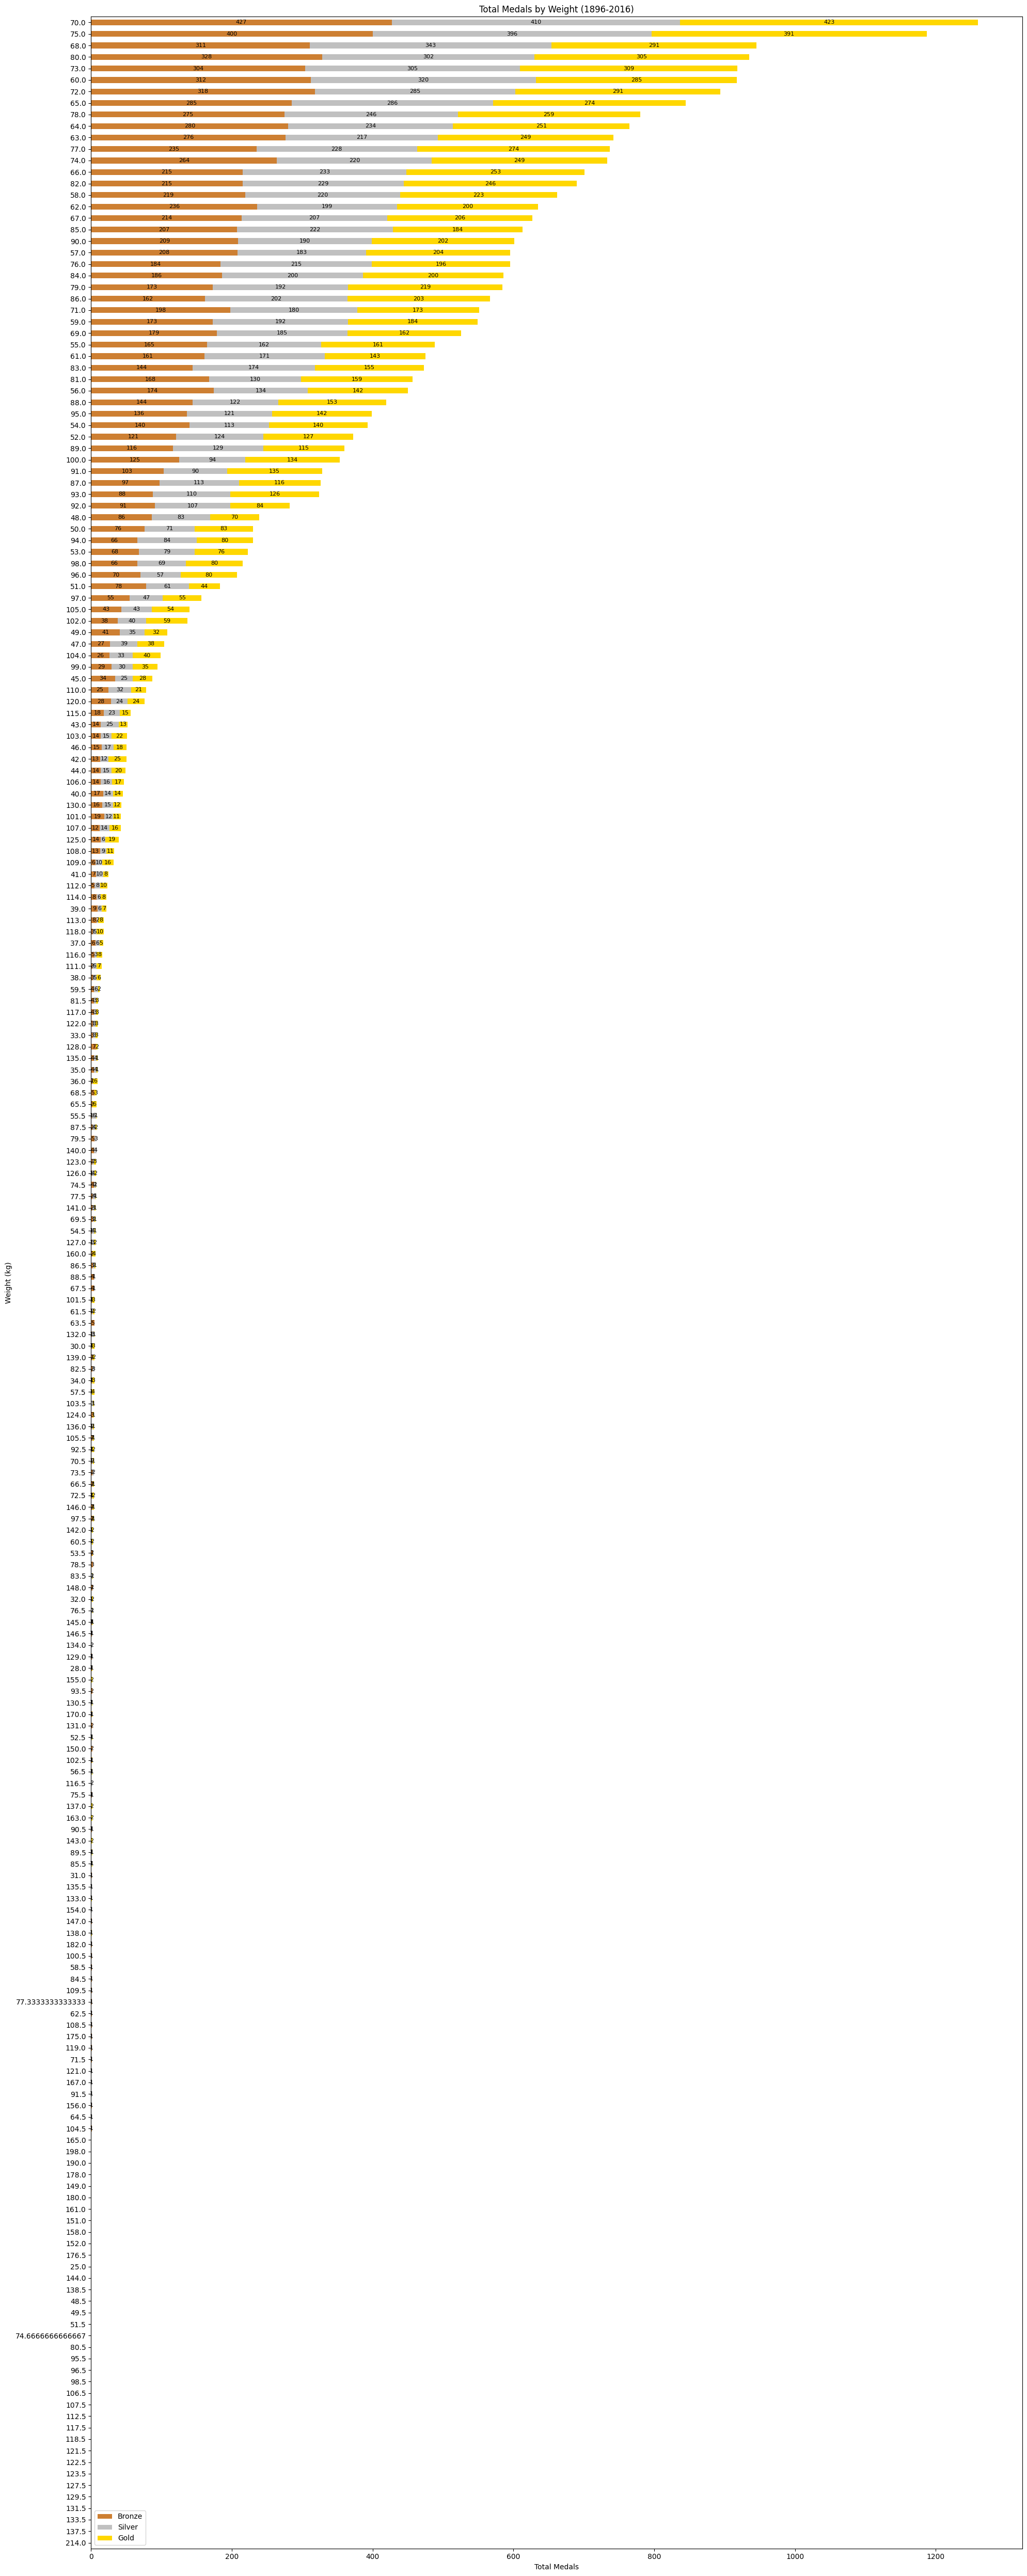

In [ ]:
# Group by 'Weight' and sum the medal counts
weight_medal_counts = backup1.groupby('Weight')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate the total medals for sorting
weight_medal_counts['Total'] = weight_medal_counts['Gold'] + weight_medal_counts['Silver'] + weight_medal_counts['Bronze']

# Sort the medal counts in ascending order by total medal count
weight_medal_counts = weight_medal_counts.sort_values(by='Total', ascending=False)

# Plot the horizontal bar graph
fig, ax = plt.subplots(figsize=(20, 50))

# Plot each medal type
weight_medal_counts[['Bronze', 'Silver', 'Gold']].plot(kind='barh', stacked=True, color=['#cd7f32', '#c0c0c0', '#ffd700'], ax=ax)

# Set labels and title
ax.set_xlabel('Total Medals')
ax.set_ylabel('Weight (kg)')
ax.set_title('Total Medals by Weight (1896-2016)')

# Display the total medal count on the bars
for i in ax.patches:
    # Find the position for the text
    width = i.get_width()
    if width > 0:  # Only display text for non-zero values
        ax.text(i.get_x() + width / 2, i.get_y() + i.get_height() / 2, str(int(width)),
                fontsize=8, color='black', va='center', ha='center')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Invert the y-axis to display the highest medal count at the top
ax.invert_yaxis()

# Show the plot
plt.show()

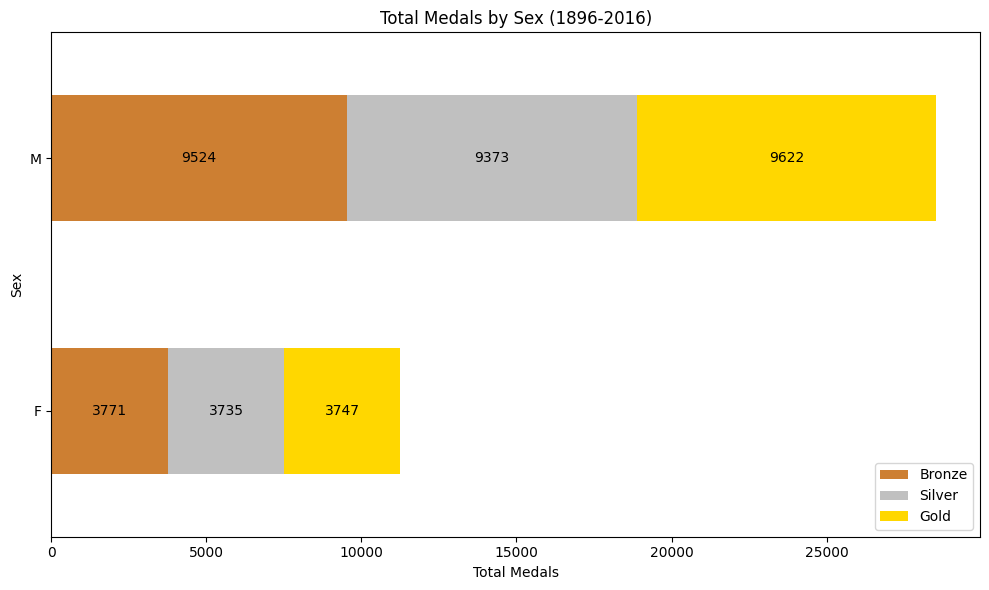

In [ ]:
# Group by 'Sex' and sum the medal counts
sex_medal_counts = backup1.groupby('Sex')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate the total medals for sorting
sex_medal_counts['Total'] = sex_medal_counts['Gold'] + sex_medal_counts['Silver'] + sex_medal_counts['Bronze']

# Sort the medal counts in descending order by total medals
sex_medal_counts = sex_medal_counts.sort_values(by='Total', ascending=False)

# Plot the horizontal bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each medal type
sex_medal_counts[['Bronze', 'Silver', 'Gold']].plot(kind='barh', stacked=True, color=['#cd7f32', '#c0c0c0', '#ffd700'], ax=ax)

# Set labels and title
ax.set_xlabel('Total Medals')
ax.set_ylabel('Sex')
ax.set_title('Total Medals by Sex (1896-2016)')

# Display the total medal count on the bars
for i in ax.patches:
    # Find the position for the text
    width = i.get_width()
    if width > 0:  # Only display text for non-zero values
        ax.text(i.get_x() + width / 2, i.get_y() + i.get_height() / 2, str(int(width)),
                fontsize=10, color='black', va='center', ha='center')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Invert the y-axis to display the highest medal count at the top
ax.invert_yaxis()

# Show the plot
plt.show()

In [ ]:
backup1.head()

ID                            Name Sex   Age  Height  Weight  \
113465   57486             Pantelis Karasevdas   M   NaN     NaN     NaN   
236410  118532              Momcsill Tapavicza   M  23.0     NaN     NaN   
70118    35708               Marie Lon Flameng   M  18.0     NaN     NaN   
82893    42102               Miltiadis Gouskos   M   NaN     NaN     NaN   
82822    42069  Grantley Thomas Smart Goulding   M  22.0     NaN     NaN   

                 Team  NOC        Games  Year  Season    City      Sport  \
113465         Greece  GRE  1896 Summer  1896  Summer  Athina   Shooting   
236410        Hungary  HUN  1896 Summer  1896  Summer  Athina     Tennis   
70118          France  FRA  1896 Summer  1896  Summer  Athina    Cycling   
82893          Greece  GRE  1896 Summer  1896  Summer  Athina  Athletics   
82822   Great Britain  GBR  1896 Summer  1896  Summer  Athina  Athletics   

                                            Event   Medal   region notes  \
113465  Shooting Men's Military Rifle, 200 metres    Gold   Greece   NaN   
236410                       Tennis Men's Singles  Bronze  Hungary   NaN   
70118                Cycling Men's 100 kilometres    Gold   France   NaN   
82893                    Athletics Men's Shot Put  Silver   Greece   NaN   
82822          Athletics Men's 110 metres Hurdles  Silver       UK   NaN   

        Bronze   Gold  Silver  
113465   False   True   False  
236410    True  False   False  
70118    False   True   False  
82893    False  False    True  
82822    False  False    True

In [ ]:
# Create a backup of backup1
backup2 = backup1.copy()

# Print the first few rows of backup2 to verify
backup2.head()

ID                            Name Sex   Age  Height  Weight  \
113465   57486             Pantelis Karasevdas   M   NaN     NaN     NaN   
236410  118532              Momcsill Tapavicza   M  23.0     NaN     NaN   
70118    35708               Marie Lon Flameng   M  18.0     NaN     NaN   
82893    42102               Miltiadis Gouskos   M   NaN     NaN     NaN   
82822    42069  Grantley Thomas Smart Goulding   M  22.0     NaN     NaN   

                 Team  NOC        Games  Year  Season    City      Sport  \
113465         Greece  GRE  1896 Summer  1896  Summer  Athina   Shooting   
236410        Hungary  HUN  1896 Summer  1896  Summer  Athina     Tennis   
70118          France  FRA  1896 Summer  1896  Summer  Athina    Cycling   
82893          Greece  GRE  1896 Summer  1896  Summer  Athina  Athletics   
82822   Great Britain  GBR  1896 Summer  1896  Summer  Athina  Athletics   

                                            Event   Medal   region notes  \
113465  Shooting Men's Military Rifle, 200 metres    Gold   Greece   NaN   
236410                       Tennis Men's Singles  Bronze  Hungary   NaN   
70118                Cycling Men's 100 kilometres    Gold   France   NaN   
82893                    Athletics Men's Shot Put  Silver   Greece   NaN   
82822          Athletics Men's 110 metres Hurdles  Silver       UK   NaN   

        Bronze   Gold  Silver  
113465   False   True   False  
236410    True  False   False  
70118    False   True   False  
82893    False  False    True  
82822    False  False    True

In [ ]:
# Drop unnecessary columns
backup2 = backup2.drop(['ID', 'Name', 'Team', 'Games', 'Sport', 'region', 'notes', 'Bronze', 'Gold', 'Silver'], axis=1)

In [ ]:
backup2.head()

Sex   Age  Height  Weight  NOC  Year  Season    City  \
113465   M   NaN     NaN     NaN  GRE  1896  Summer  Athina   
236410   M  23.0     NaN     NaN  HUN  1896  Summer  Athina   
70118    M  18.0     NaN     NaN  FRA  1896  Summer  Athina   
82893    M   NaN     NaN     NaN  GRE  1896  Summer  Athina   
82822    M  22.0     NaN     NaN  GBR  1896  Summer  Athina   

                                            Event   Medal  
113465  Shooting Men's Military Rifle, 200 metres    Gold  
236410                       Tennis Men's Singles  Bronze  
70118                Cycling Men's 100 kilometres    Gold  
82893                    Athletics Men's Shot Put  Silver  
82822          Athletics Men's 110 metres Hurdles  Silver

In [ ]:
# Create a backup of backup2
backup3 = backup2.copy()

# Print the first few rows of backup2 to verify
backup3.head(50)

Sex   Age  Height  Weight  NOC  Year  Season    City  \
113465   M   NaN     NaN     NaN  GRE  1896  Summer  Athina   
236410   M  23.0     NaN     NaN  HUN  1896  Summer  Athina   
70118    M  18.0     NaN     NaN  FRA  1896  Summer  Athina   
82893    M   NaN     NaN     NaN  GRE  1896  Summer  Athina   
82822    M  22.0     NaN     NaN  GBR  1896  Summer  Athina   
22953    M  24.0     NaN     NaN  USA  1896  Summer  Athina   
22952    M  24.0     NaN     NaN  USA  1896  Summer  Athina   
70195    M  26.0     NaN     NaN  GER  1896  Summer  Athina   
182918   M  17.0     NaN     NaN  GRE  1896  Summer  Athina   
182919   M  17.0     NaN     NaN  GRE  1896  Summer  Athina   
70196    M  26.0     NaN     NaN  GER  1896  Summer  Athina   
171110   M  29.0     NaN     NaN  DEN  1896  Summer  Athina   
171109   M  29.0     NaN     NaN  DEN  1896  Summer  Athina   
171108   M  29.0     NaN     NaN  DEN  1896  Summer  Athina   
171107   M  29.0     NaN     NaN  DEN  1896  Summer  Athina   
97180    M  24.0   167.0    56.0  GER  1896  Summer  Athina   
97181    M  24.0   167.0    56.0  GER  1896  Summer  Athina   
97182    M  24.0   167.0    56.0  GER  1896  Summer  Athina   
97183    M  24.0   167.0    56.0  GER  1896  Summer  Athina   
97184    M  24.0   167.0    56.0  GER  1896  Summer  Athina   
97185    M  24.0   167.0    56.0  GER  1896  Summer  Athina   
171106   M  29.0     NaN     NaN  DEN  1896  Summer  Athina   
171105   M  29.0     NaN     NaN  DEN  1896  Summer  Athina   
70197    M  26.0     NaN     NaN  GER  1896  Summer  Athina   
236411   M  23.0     NaN     NaN  HUN  1896  Summer  Athina   
70117    M  18.0     NaN     NaN  FRA  1896  Summer  Athina   
236412   M  23.0     NaN     NaN  HUN  1896  Summer  Athina   
70116    M  18.0     NaN     NaN  FRA  1896  Summer  Athina   
84519    M   NaN     NaN     NaN  GRE  1896  Summer  Athina   
23918    M  25.0     NaN     NaN  GER  1896  Summer  Athina   
23917    M  25.0     NaN     NaN  GER  1896  Summer  Athina   
23916    M  25.0     NaN     NaN  GER  1896  Summer  Athina   
23915    M  25.0     NaN     NaN  GER  1896  Summer  Athina   
23914    M  25.0     NaN     NaN  GER  1896  Summer  Athina   
23913    M  25.0     NaN     NaN  GER  1896  Summer  Athina   
23912    M  25.0     NaN     NaN  GER  1896  Summer  Athina   
70079    M  22.0     NaN     NaN  AUS  1896  Summer  Athina   
70080    M  22.0     NaN     NaN  AUS  1896  Summer  Athina   
70081    M  22.0     NaN     NaN  AUS  1896  Summer  Athina   
70198    M  26.0     NaN     NaN  GER  1896  Summer  Athina   
10332    M   NaN     NaN     NaN  GRE  1896  Summer  Athina   
70083    M  22.0     NaN     NaN  AUS  1896  Summer  Athina   
83614    M  20.0     NaN     NaN  FRA  1896  Summer  Athina   
70115    M  18.0     NaN     NaN  FRA  1896  Summer  Athina   
96051    M  19.0     NaN     NaN  GER  1896  Summer  Athina   
96052    M  19.0     NaN     NaN  GER  1896  Summer  Athina   
157545   M  34.0     NaN     NaN  GRE  1896  Summer  Athina   
157544   M  34.0     NaN     NaN  GRE  1896  Summer  Athina   
96053    M  19.0     NaN     NaN  GER  1896  Summer  Athina   
96054    M  19.0     NaN     NaN  GER  1896  Summer  Athina   

                                                    Event   Medal  
113465          Shooting Men's Military Rifle, 200 metres    Gold  
236410                               Tennis Men's Singles  Bronze  
70118                        Cycling Men's 100 kilometres    Gold  
82893                            Athletics Men's Shot Put  Silver  
82822                  Athletics Men's 110 metres Hurdles  Silver  
22953                            Athletics Men's Marathon     NaN  
22952                        Athletics Men's 1,500 metres  Silver  
70195                        Gymnastics Men's Horse Vault     NaN  
182918                               Tennis Men's Singles  Bronze  
182919                               Tennis Men's Doubles     NaN  
70196                      Gymnastics Men's P

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns to numeric
backup3['Sex'] = label_encoder.fit_transform(backup3['Sex'])
backup3['NOC'] = label_encoder.fit_transform(backup3['NOC'])
backup3['Season'] = label_encoder.fit_transform(backup3['Season'])
backup3['City'] = label_encoder.fit_transform(backup3['City'])
backup3['Event'] = label_encoder.fit_transform(backup3['Event'])
backup3['Medal'] = label_encoder.fit_transform(backup3['Medal'])

# Display the first few rows of the transformed dataframe
backup3.head()

Sex   Age  Height  Weight  NOC  Year  Season  City  Event  Medal
113465    1   NaN     NaN     NaN   81  1896       0     3    529      1
236410    1  23.0     NaN     NaN   90  1896       0     3    698      0
70118     1  18.0     NaN     NaN   69  1896       0     3    258      1
82893     1   NaN     NaN     NaN   81  1896       0     3    119      2
82822     1  22.0     NaN     NaN   74  1896       0     3     77      2

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()


# Encode and print the mapping for each column
columns_to_encode = ['Sex', 'NOC', 'Season', 'City', 'Event', 'Medal']
for column in columns_to_encode:
    backup3[column] = label_encoder.fit_transform(backup3[column])
    # Print the mapping
    print(f"Mapping for {column}:")
    for class_label, numeric_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f"{class_label} -> {numeric_label}")
    print("\n")

# Display the first few rows of the transformed dataframe
backup3.head(50)

Mapping for Sex:
0 -> 0
1 -> 1


Mapping for NOC:
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7
8 -> 8
9 -> 9
10 -> 10
11 -> 11
12 -> 12
13 -> 13
14 -> 14
15 -> 15
16 -> 16
17 -> 17
18 -> 18
19 -> 19
20 -> 20
21 -> 21
22 -> 22
23 -> 23
24 -> 24
25 -> 25
26 -> 26
27 -> 27
28 -> 28
29 -> 29
30 -> 30
31 -> 31
32 -> 32
33 -> 33
34 -> 34
35 -> 35
36 -> 36
37 -> 37
38 -> 38
39 -> 39
40 -> 40
41 -> 41
42 -> 42
43 -> 43
44 -> 44
45 -> 45
46 -> 46
47 -> 47
48 -> 48
49 -> 49
50 -> 50
51 -> 51
52 -> 52
53 -> 53
54 -> 54
55 -> 55
56 -> 56
57 -> 57
58 -> 58
59 -> 59
60 -> 60
61 -> 61
62 -> 62
63 -> 63
64 -> 64
65 -> 65
66 -> 66
67 -> 67
68 -> 68
69 -> 69
70 -> 70
71 -> 71
72 -> 72
73 -> 73
74 -> 74
75 -> 75
76 -> 76
77 -> 77
78 -> 78
79 -> 79
80 -> 80
81 -> 81
82 -> 82
83 -> 83
84 -> 84
85 -> 85
86 -> 86
87 -> 87
88 -> 88
89 -> 89
90 -> 90
91 -> 91
92 -> 92
93 -> 93
94 -> 94
95 -> 95
96 -> 96
97 -> 97
98 -> 98
99 -> 99
100 -> 100
101 -> 101
102 -> 102
103 -> 103
104 -> 104
105 -> 105
106 

Sex   Age  Height  Weight  NOC  Year  Season  City  Event  Medal
113465    1   NaN     NaN     NaN   81  1896       0     3    529      1
236410    1  23.0     NaN     NaN   90  1896       0     3    698      0
70118     1  18.0     NaN     NaN   69  1896       0     3    258      1
82893     1   NaN     NaN     NaN   81  1896       0     3    119      2
82822     1  22.0     NaN     NaN   74  1896       0     3     77      2
22953     1  24.0     NaN     NaN  216  1896       0     3    115      3
22952     1  24.0     NaN     NaN  216  1896       0     3     70      2
70195     1  26.0     NaN     NaN   79  1896       0     3    367      3
182918    1  17.0     NaN     NaN   81  1896       0     3    698      0
182919    1  17.0     NaN     NaN   81  1896       0     3    696      3
70196     1  26.0     NaN     NaN   79  1896       0     3    373      1
171110    1  29.0     NaN     NaN   55  1896       0     3    106      3
171109    1  29.0     NaN     NaN   55  1896       0     3    529      3
171108    1  29.0     NaN     NaN   55  1896       0     3    542      0
171107    1  29.0     NaN     NaN   55  1896       0     3    523      3
97180     1  24.0   167.0    56.0   79  1896       0     3     76      2
97181     1  24.0   167.0    56.0   79  1896       0     3     93      3
97182     1  24.0   167.0    56.0   79  1896       0     3    377      0
97183     1  24.0   167.0    56.0   79  1896       0     3    110      3
97184     1  24.0   167.0    56.0   79  1896       0     3    125      3
97185     1  24.0   167.0    56.0   79  1896       0     3    119      3
171106    1  29.0     NaN     NaN   55  1896       0     3    327      0
171105    1  29.0     NaN     NaN   55  1896       0     3    509      2
70197     1  26.0     NaN     NaN   79  1896       0     3    374      1
236411    1  23.0     NaN     NaN   90  1896       0     3    727      3
70117     1  18.0     NaN     NaN   69  1896       0     3    257      2
236412    1  23.0     NaN     NaN   90  1896       0     3    756      3
70116     1  18.0     NaN     NaN   69  1896       0     3    265      3
84519     1   NaN     NaN     NaN   81  1896       0     3    115      3
23918     1  25.0     NaN     NaN   79  1896       0     3    375      3
23917     1  25.0     NaN     NaN   79  1896       0     3    376      3
23916     1  25.0     NaN     NaN   79  1896       0     3    366      1
23915     1  25.0     NaN     NaN   79  1896       0     3    365      3
23914     1  25.0     NaN     NaN   79  1896       0     3    374      1
23913     1  25.0     NaN     NaN   79  1896       0     3    373      3
23912     1  25.0     NaN     NaN   79  1896       0     3    367      3
70079     1  22.0     NaN     NaN   12  1896       0     3    698      3
70080     1  22.0     NaN     NaN   12  1896       0     3    696      0
70081     1  22.0     NaN     NaN   12  1896       0     3    101      1
70198     1  26.0     NaN     NaN   79  1896       0     3    365      2
10332     1   NaN     NaN     NaN   81  1896       0     3    277      3
70083     1  22.0     NaN     NaN   12  1896       0     3    115      3
83614     1  20.0     NaN     NaN   69  1896       0     3    324      1
70115     1  18.0     NaN     NaN   69  1896       0     3    279      0
96051     1  19.0     NaN     NaN   79  1896       0     3    367      3
96052     1  19.0     NaN     NaN   79  1896       0     3    373      3
157545    1  34.0     NaN     NaN   81  1896       0     3    529      3
157544    1  34.0     NaN     NaN   81  1896       0     3    521      3
96053     1  19.0     NaN     NaN   79  1896       0     3    374      1
96054     1  19.0     NaN     NaN   79  1896       0     3    365      3

In [ ]:
# Define the independent variables (features) and dependent variable (target)
X = backup3.drop('Medal', axis=1)
Y = backup3['Medal']

# Check the shapes of X and Y to ensure they are correct
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (269731, 9)
Shape of Y: (269731,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with an 80-20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets to ensure they are correct
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (215784, 9)
Shape of X_test: (53947, 9)
Shape of Y_train: (215784,)
Shape of Y_test: (53947,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the scaled datasets to ensure they are correct
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (215784, 9)
Shape of X_test_scaled: (53947, 9)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
import numpy as np

# Check for NaN values in the training and testing datasets
print("NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaN values in X_test_scaled:", np.isnan(X_test_scaled).sum())

# Initialize the KNN imputer to handle missing values
imputer = KNNImputer(n_neighbors=5)

# Impute missing values in the training and testing data
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled, Y_train)

# Wrap tqdm around the training loop for a progress bar
with tqdm(total=9, desc="Training Models", unit="model") as pbar:

    # 1. Random Forest
    param_grid_rf = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }

    rf = RandomForestClassifier(random_state=42, class_weight='balanced')
    grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', verbose=2)
    grid_search_rf.fit(X_train_resampled, Y_train_resampled)
    best_rf = grid_search_rf.best_estimator_
    Y_pred_rf = best_rf.predict(X_test_scaled)
    print("Classification Report for Random Forest:")
    print(classification_report(Y_test, Y_pred_rf))
    pbar.update(1)

    # 2. XGBoost
    param_grid_xgb = {
        'learning_rate': [0.01, 0.1, 0.3],
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 10],
        'scale_pos_weight': [1, 3, 5]
    }

    xgb = XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)
    grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='accuracy', verbose=2)
    grid_search_xgb.fit(X_train_resampled, Y_train_resampled)
    best_xgb = grid_search_xgb.best_estimator_
    Y_pred_xgb = best_xgb.predict(X_test_scaled)
    print("Classification Report for XGBoost:")
    print(classification_report(Y_test, Y_pred_xgb))
    pbar.update(1)

    # 3. LightGBM
    param_grid_lgbm = {
        'learning_rate': [0.01, 0.1, 0.3],
        'n_estimators': [100, 200],
        'max_depth': [-1, 10, 20],
        'num_leaves': [31, 50, 100]
    }

    lgbm = LGBMClassifier(objective='multiclass', random_state=42)
    grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=3, scoring='accuracy', verbose=2)
    grid_search_lgbm.fit(X_train_resampled, Y_train_resampled)
    best_lgbm = grid_search_lgbm.best_estimator_
    Y_pred_lgbm = best_lgbm.predict(X_test_scaled)
    print("Classification Report for LightGBM:")
    print(classification_report(Y_test, Y_pred_lgbm))
    pbar.update(1)

    # 4. Logistic Regression
    lr = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
    lr.fit(X_train_resampled, Y_train_resampled)
    Y_pred_lr = lr.predict(X_test_scaled)
    print("Classification Report for Logistic Regression:")
    print(classification_report(Y_test, Y_pred_lr))
    pbar.update(1)

    # 5. K-Nearest Neighbors (KNN)
    param_grid_knn = {
        'n_neighbors': [5, 10, 20],
        'weights': ['uniform', 'distance']
    }

    knn = KNeighborsClassifier()
    grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring='accuracy', verbose=2)
    grid_search_knn.fit(X_train_resampled, Y_train_resampled)
    best_knn = grid_search_knn.best_estimator_
    Y_pred_knn = best_knn.predict(X_test_scaled)
    print("Classification Report for KNN:")
    print(classification_report(Y_test, Y_pred_knn))
    pbar.update(1)

    # 6. Naive Bayes (No GridSearch needed)
    nb = GaussianNB()
    nb.fit(X_train_resampled, Y_train_resampled)
    Y_pred_nb = nb.predict(X_test_scaled)
    print("Classification Report for Naive Bayes:")
    print(classification_report(Y_test, Y_pred_nb))
    pbar.update(1)

    # 7. Neural Network (MLPClassifier)
    param_grid_nn = {
        'hidden_layer_sizes': [(100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    }

    nn = MLPClassifier(random_state=42, max_iter=1000)
    grid_search_nn = GridSearchCV(nn, param_grid_nn, cv=3, scoring='accuracy', verbose=2)
    grid_search_nn.fit(X_train_resampled, Y_train_resampled)
    best_nn = grid_search_nn.best_estimator_
    Y_pred_nn = best_nn.predict(X_test_scaled)
    print("Classification Report for Neural Network:")
    print(classification_report(Y_test, Y_pred_nn))
    pbar.update(1)

    # 8. AdaBoost
    param_grid_ada = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }

    ada = AdaBoostClassifier(random_state=42)
    grid_search_ada = GridSearchCV(ada, param_grid_ada, cv=3, scoring='accuracy', verbose=2)
    grid_search_ada.fit(X_train_resampled, Y_train_resampled)
    best_ada = grid_search_ada.best_estimator_
    Y_pred_ada = best_ada.predict(X_test_scaled)
    print("Classification Report for AdaBoost:")
    print(classification_report(Y_test, Y_pred_ada))
    pbar.update(1)

    # 9. Gradient Boosting
    param_grid_gb = {
        'learning_rate': [0.01, 0.1],
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 10]
    }

    gb = GradientBoostingClassifier(random_state=42)
    grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=3, scoring='accuracy', verbose=2)
    grid_search_gb.fit(X_train_resampled, Y_train_resampled)
    best_gb = grid_search_gb.best_estimator_
    Y_pred_gb = best_gb.predict(X_test_scaled)
    print("Classification Report for Gradient Boosting:")
    print(classification_report(Y_test, Y_pred_gb))
    pbar.update(1)

NaN values in X_train_scaled: 103866
NaN values in X_test_scaled: 25790


Training Models:   0%|                                                                        | 0/9 [00:00<?, ?model/s]

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 2.5min
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 2.3min
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 2.3min
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time= 4.9min
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time= 4.7min
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time= 4.8min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 2.5min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 2.3min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 2.3min
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time= 5.3min
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time= 5.1min
[CV] END max_depth=10, min_samples_split=5, n_es

Training Models:  11%|██████▏                                                 | 1/9 [5:42:35<45:40:47, 20555.94s/model]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.41      0.30      0.35      2672
           1       0.52      0.44      0.47      2736
           2       0.42      0.33      0.37      2596
           3       0.91      0.95      0.93     45943

    accuracy                           0.86     53947
   macro avg       0.57      0.50      0.53     53947
weighted avg       0.84      0.86      0.85     53947

Fitting 3 folds for each of 54 candidates, totalling 162 fits


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:56:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1; total time=   3.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:56:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1; total time=   3.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:56:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1; total time=   3.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:56:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=3; total time=   3.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:56:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=3; total time=   3.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:56:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=3; total time=   3.8s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:56:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=5; total time=   3.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:56:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=5; total time=   3.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:56:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=5; total time=   3.8s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:56:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=1; total time=   7.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:57:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=1; total time=   7.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:57:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=1; total time=   7.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:57:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=3; total time=   7.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:57:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=3; total time=   7.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:57:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=3; total time=   7.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:57:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=5; total time=   7.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:57:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=5; total time=   7.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:57:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=5; total time=   7.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:58:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, scale_pos_weight=1; total time=   5.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:58:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, scale_pos_weight=1; total time=   5.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:58:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, scale_pos_weight=1; total time=   5.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:58:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, scale_pos_weight=3; total time=   5.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:58:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, scale_pos_weight=3; total time=   5.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:58:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, scale_pos_weight=3; total time=   5.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:58:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, scale_pos_weight=5; total time=   5.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:58:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, scale_pos_weight=5; total time=   5.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:58:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, scale_pos_weight=5; total time=   5.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:58:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, scale_pos_weight=1; total time=  11.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:59:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, scale_pos_weight=1; total time=  11.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:59:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, scale_pos_weight=1; total time=  10.9s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:59:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, scale_pos_weight=3; total time=  10.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:59:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, scale_pos_weight=3; total time=  11.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:59:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, scale_pos_weight=3; total time=  10.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [02:59:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, scale_pos_weight=5; total time=  10.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:00:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, scale_pos_weight=5; total time=  10.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:00:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, scale_pos_weight=5; total time=  10.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:00:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=1; total time=   9.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:00:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=1; total time=  10.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:00:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=1; total time=   9.8s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:00:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=3; total time=   9.8s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:01:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=3; total time=  10.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:01:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=3; total time=   9.8s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:01:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=5; total time=  10.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:01:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=5; total time=  10.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:01:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=5; total time=  10.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:01:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=1; total time=  20.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:02:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=1; total time=  20.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:02:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=1; total time=  20.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:03:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=3; total time=  20.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:03:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=3; total time=  19.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:03:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=3; total time=  19.8s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:04:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=5; total time=  19.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:04:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=5; total time=  18.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:04:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=5; total time=  19.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:04:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=1; total time=   4.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:05:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=1; total time=   4.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:05:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=1; total time=   4.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:05:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=3; total time=   4.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:05:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=3; total time=   4.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:05:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=3; total time=   4.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:05:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=5; total time=   4.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:05:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=5; total time=   4.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:05:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=5; total time=   4.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:05:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=1; total time=   9.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:05:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=1; total time=   8.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:05:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=1; total time=   8.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:06:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=3; total time=   8.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:06:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=3; total time=   8.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:06:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=3; total time=   8.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:06:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=5; total time=   8.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:06:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=5; total time=   8.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:06:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=5; total time=   8.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:06:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, scale_pos_weight=1; total time=   5.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:07:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, scale_pos_weight=1; total time=   5.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:07:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, scale_pos_weight=1; total time=   5.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:07:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, scale_pos_weight=3; total time=   5.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:07:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, scale_pos_weight=3; total time=   5.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:07:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, scale_pos_weight=3; total time=   5.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:07:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, scale_pos_weight=5; total time=   5.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:07:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, scale_pos_weight=5; total time=   5.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:07:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, scale_pos_weight=5; total time=   5.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:07:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, scale_pos_weight=1; total time=  10.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:07:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, scale_pos_weight=1; total time=   9.8s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:08:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, scale_pos_weight=1; total time=  10.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:08:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, scale_pos_weight=3; total time=   9.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:08:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, scale_pos_weight=3; total time=  10.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:08:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, scale_pos_weight=3; total time=   9.9s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:08:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, scale_pos_weight=5; total time=   9.8s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:08:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, scale_pos_weight=5; total time=  10.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, scale_pos_weight=5; total time=  10.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:09:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=1; total time=   8.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:09:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=1; total time=   8.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:09:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=1; total time=   8.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=3; total time=   8.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:09:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=3; total time=   8.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:10:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=3; total time=   8.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:10:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=5; total time=   8.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:10:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=5; total time=   8.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:10:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=5; total time=   8.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:10:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=1; total time=  15.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:10:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=1; total time=  16.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:11:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=1; total time=  16.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:11:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=3; total time=  15.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:11:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=3; total time=  16.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:11:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=3; total time=  16.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:12:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=5; total time=  15.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:12:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=5; total time=  15.9s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:12:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=5; total time=  16.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:12:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, scale_pos_weight=1; total time=   5.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:13:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, scale_pos_weight=1; total time=   4.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:13:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, scale_pos_weight=1; total time=   4.8s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:13:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, scale_pos_weight=3; total time=   4.8s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:13:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, scale_pos_weight=3; total time=   4.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:13:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, scale_pos_weight=3; total time=   4.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:13:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, scale_pos_weight=5; total time=   4.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, scale_pos_weight=5; total time=   4.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:13:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=100, scale_pos_weight=5; total time=   4.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:13:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=200, scale_pos_weight=1; total time=   9.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:13:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=200, scale_pos_weight=1; total time=   9.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:14:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=200, scale_pos_weight=1; total time=   8.8s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:14:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=200, scale_pos_weight=3; total time=   8.9s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:14:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=200, scale_pos_weight=3; total time=   8.8s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:14:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=200, scale_pos_weight=3; total time=   8.9s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:14:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=200, scale_pos_weight=5; total time=   8.9s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:14:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=200, scale_pos_weight=5; total time=   9.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:14:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=3, n_estimators=200, scale_pos_weight=5; total time=   9.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:15:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=100, scale_pos_weight=1; total time=   5.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:15:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=100, scale_pos_weight=1; total time=   5.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:15:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=100, scale_pos_weight=1; total time=   5.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:15:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=100, scale_pos_weight=3; total time=   5.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:15:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=100, scale_pos_weight=3; total time=   5.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:15:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=100, scale_pos_weight=3; total time=   5.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:15:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=100, scale_pos_weight=5; total time=   5.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:15:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=100, scale_pos_weight=5; total time=   5.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:15:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=100, scale_pos_weight=5; total time=   4.9s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:15:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=200, scale_pos_weight=1; total time=  10.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:16:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=200, scale_pos_weight=1; total time=   9.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:16:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=200, scale_pos_weight=1; total time=   9.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:16:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=200, scale_pos_weight=3; total time=   9.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:16:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=200, scale_pos_weight=3; total time=   9.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:16:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=200, scale_pos_weight=3; total time=   9.7s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:16:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=200, scale_pos_weight=5; total time=   9.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:16:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=200, scale_pos_weight=5; total time=   9.8s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:17:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=6, n_estimators=200, scale_pos_weight=5; total time=   9.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:17:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=100, scale_pos_weight=1; total time=   7.8s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:17:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=100, scale_pos_weight=1; total time=   8.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:17:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=100, scale_pos_weight=1; total time=   8.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:17:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=100, scale_pos_weight=3; total time=   8.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:17:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=100, scale_pos_weight=3; total time=   8.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:17:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=100, scale_pos_weight=3; total time=   8.3s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:18:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=100, scale_pos_weight=5; total time=   8.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:18:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=100, scale_pos_weight=5; total time=   8.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:18:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=100, scale_pos_weight=5; total time=   7.9s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:18:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=200, scale_pos_weight=1; total time=  15.6s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=200, scale_pos_weight=1; total time=  16.5s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:19:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=200, scale_pos_weight=1; total time=  16.1s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=200, scale_pos_weight=3; total time=  15.9s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:19:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=200, scale_pos_weight=3; total time=  16.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:19:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=200, scale_pos_weight=3; total time=  16.4s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:20:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=200, scale_pos_weight=5; total time=  16.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:20:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=200, scale_pos_weight=5; total time=  16.0s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:20:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.3, max_depth=10, n_estimators=200, scale_pos_weight=5; total time=  16.2s


C:\Users\xtanv\anaconda3\envs\pytorch\lib\site-packages\xgboost\core.py:158: UserWarning: [03:20:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
Training Models:  22%|████████████▋                                            | 2/9 [6:07:36<18:10:26, 9346.60s/model]

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.47      0.24      0.32      2672
           1       0.54      0.41      0.47      2736
           2       0.47      0.27      0.34      2596
           3       0.90      0.96      0.93     45943

    accuracy                           0.87     53947
   macro avg       0.60      0.47      0.52     53947
weighted avg       0.84      0.87      0.85     53947

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1818
[LightGBM] [Info] Number of data points in the train set: 490709, number of used features: 9
[LightGBM] [Info] Start training from score -1.386296
[LightGBM] [Info] Start training from score -1.386296
[LightGBM] [Info] Start training from score -1.386288
[LightGBM] [Info]

Training Models:  33%|███████████████████▎                                      | 3/9 [6:24:19<9:13:40, 5536.82s/model]

Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.53      0.23      0.32      2672
           1       0.58      0.42      0.49      2736
           2       0.50      0.25      0.34      2596
           3       0.90      0.97      0.94     45943

    accuracy                           0.87     53947
   macro avg       0.63      0.47      0.52     53947
weighted avg       0.85      0.87      0.85     53947



Training Models:  44%|█████████████████████████▊                                | 4/9 [6:24:20<4:39:18, 3351.66s/model]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.05      0.14      0.07      2672
           1       0.08      0.39      0.13      2736
           2       0.08      0.17      0.11      2596
           3       0.90      0.53      0.67     45943

    accuracy                           0.49     53947
   macro avg       0.28      0.31      0.24     53947
weighted avg       0.77      0.49      0.58     53947

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .....................n_neighbors=5, weights=uniform; total time=  30.7s
[CV] END .....................n_neighbors=5, weights=uniform; total time=  30.7s
[CV] END .....................n_neighbors=5, weights=uniform; total time=  31.1s
[CV] END ....................n_neighbors=5, weights=distance; total time=  25.8s
[CV] END ....................n_neighbors=5, weights=distance; total time=  25.6s
[CV] END ....................n_neighbors=5, weights=d

Training Models:  56%|████████████████████████████████▏                         | 5/9 [6:36:58<2:41:05, 2416.29s/model]

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.13      0.29      0.18      2672
           1       0.20      0.40      0.26      2736
           2       0.15      0.32      0.20      2596
           3       0.92      0.74      0.82     45943

    accuracy                           0.68     53947
   macro avg       0.35      0.44      0.37     53947
weighted avg       0.81      0.68      0.73     53947



Training Models:  67%|██████████████████████████████████████▋                   | 6/9 [6:36:59<1:19:44, 1594.83s/model]

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.05      0.21      0.08      2672
           1       0.08      0.35      0.14      2736
           2       0.07      0.13      0.09      2596
           3       0.89      0.53      0.66     45943

    accuracy                           0.48     53947
   macro avg       0.28      0.31      0.24     53947
weighted avg       0.77      0.48      0.58     53947

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=adam; total time= 3.9min
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=adam; total time= 3.8min
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=adam; total time= 2.7min
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=sgd; total time= 7.3min
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=sgd; total time= 7.1min
[CV] END activation=relu, hidden_layer_size

Training Models:  78%|████████████████████████████████████████████▎            | 7/9 [11:16:36<3:38:36, 6558.25s/model]

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.09      0.36      0.14      2672
           1       0.14      0.44      0.21      2736
           2       0.09      0.36      0.14      2596
           3       0.93      0.48      0.63     45943

    accuracy                           0.46     53947
   macro avg       0.31      0.41      0.28     53947
weighted avg       0.81      0.46      0.56     53947

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=  40.4s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=  38.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=  39.9s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time= 1.4min
[CV] END ...............learning_rate=0.01, n_estimators=100; total time= 1.3min
[CV] END ...............learning_rate=0.01, n_estimators=1

Training Models:  89%|██████████████████████████████████████████████████▋      | 8/9 [12:02:30<1:29:07, 5347.27s/model]

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.06      0.17      0.09      2672
           1       0.14      0.34      0.20      2736
           2       0.08      0.11      0.09      2596
           3       0.90      0.72      0.80     45943

    accuracy                           0.64     53947
   macro avg       0.29      0.33      0.30     53947
weighted avg       0.78      0.64      0.70     53947

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=13.5min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=12.4min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=12.4min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=27.6min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=25.0min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; t

Training Models: 100%|██████████████████████████████████████████████████████████| 9/9 [35:58:21<00:00, 14389.00s/model]

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.53      0.19      0.28      2672
           1       0.55      0.37      0.44      2736
           2       0.49      0.17      0.25      2596
           3       0.89      0.98      0.93     45943

    accuracy                           0.87     53947
   macro avg       0.62      0.43      0.48     53947
weighted avg       0.84      0.87      0.84     53947



In [ ]:
import joblib

# Save the Random Forest model
joblib.dump(best_rf, 'random_forest_model.pkl')

# Save the XGBoost model
joblib.dump(best_xgb, 'xgboost_model.pkl')

# Save the LightGBM model
joblib.dump(best_lgbm, 'lightgbm_model.pkl')

# Save the Logistic Regression model
joblib.dump(lr, 'logistic_regression_model.pkl')

# Save the KNN model
joblib.dump(best_knn, 'knn_model.pkl')

# Save the Naive Bayes model
joblib.dump(nb, 'naive_bayes_model.pkl')

# Save the Neural Network model
joblib.dump(best_nn, 'neural_network_model.pkl')

# Save the AdaBoost model
joblib.dump(best_ada, 'adaboost_model.pkl')

# Save the Gradient Boosting model
joblib.dump(best_gb, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

In [ ]:
import pickle

# Save the Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

# Save the XGBoost model
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)

# Save the LightGBM model
with open('lightgbm_model.pkl', 'wb') as f:
    pickle.dump(best_lgbm, f)

# Save the Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

# Save the KNN model
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(best_knn, f)

# Save the Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb, f)

# Save the Neural Network model
with open('neural_network_model.pkl', 'wb') as f:
    pickle.dump(best_nn, f)

# Save the AdaBoost model
with open('adaboost_model.pkl', 'wb') as f:
    pickle.dump(best_ada, f)

# Save the Gradient Boosting model
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(best_gb, f)

In [ ]:
print("Classification Report for Random Forest:")
print(classification_report(Y_test, Y_pred_rf))
pbar.update(1)

print("Classification Report for LightGBM:")
print(classification_report(Y_test, Y_pred_lgbm))
pbar.update(1)

print("Classification Report for KNN:")
print(classification_report(Y_test, Y_pred_knn))
pbar.update(1)

print("Classification Report for Naive Bayes:")
print(classification_report(Y_test, Y_pred_nb))
pbar.update(1)


print("Classification Report for Neural Network:")
print(classification_report(Y_test, Y_pred_nn))
pbar.update(1)

print("Classification Report for AdaBoost:")
print(classification_report(Y_test, Y_pred_ada))
pbar.update(1)

print("Classification Report for Gradient Boosting:")
print(classification_report(Y_test, Y_pred_gb))
pbar.update(1)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.41      0.30      0.35      2672
           1       0.52      0.44      0.47      2736
           2       0.42      0.33      0.37      2596
           3       0.91      0.95      0.93     45943

    accuracy                           0.86     53947
   macro avg       0.57      0.50      0.53     53947
weighted avg       0.84      0.86      0.85     53947

Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.53      0.23      0.32      2672
           1       0.58      0.42      0.49      2736
           2       0.50      0.25      0.34      2596
           3       0.90      0.97      0.94     45943

    accuracy                           0.87     53947
   macro avg       0.63      0.47      0.52     53947
weighted avg       0.85      0.87      0.85     53947

Classification Report for KNN:
              precisio

In [ ]:
models = {
    'RandomForest': best_rf,
    'XGBoost': best_xgb,
    'LightGBM': best_lgbm,
    'LogisticRegression': lr,
    'KNN': best_knn,
    'NaiveBayes': nb,
    'NeuralNetwork': best_nn,
    'AdaBoost': best_ada,
    'GradientBoosting': best_gb
}
with open('models.pkl', 'wb') as f:
    pickle.dump(models, f)

In [ ]:
models = {
    'RandomForest': best_rf,
    'XGBoost': best_xgb,
    'LightGBM': best_lgbm,
    'LogisticRegression': lr,
    'KNN': best_knn,
    'NaiveBayes': nb,
    'NeuralNetwork': best_nn,
    'AdaBoost': best_ada,
    'GradientBoosting': best_gb
}
joblib.dump(models, 'models.joblib')

['models.joblib']